In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["4", "6"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


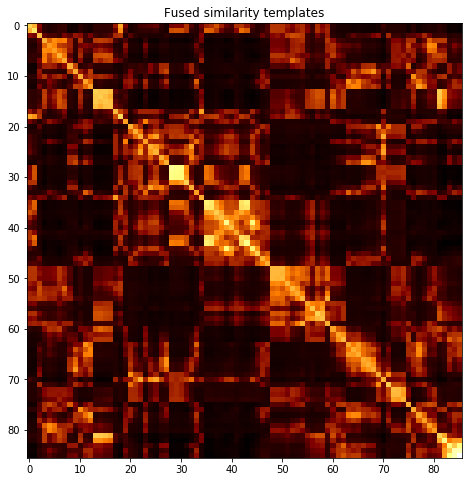

subject 30; gesture 1_1_1


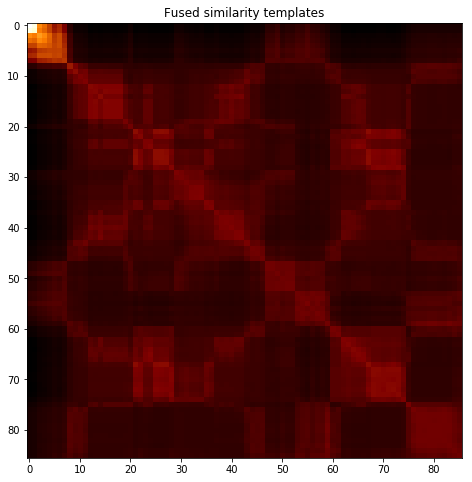

subject 30; gesture 1_0_1


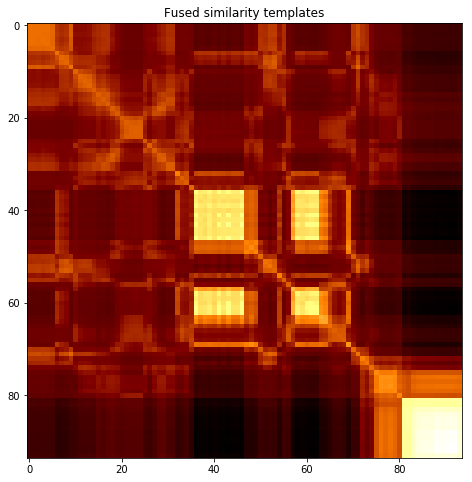

subject 30; gesture 1_0_2


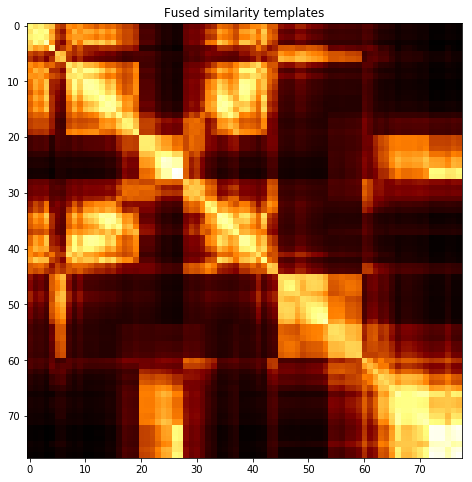

subject 06; gesture 1_1_2


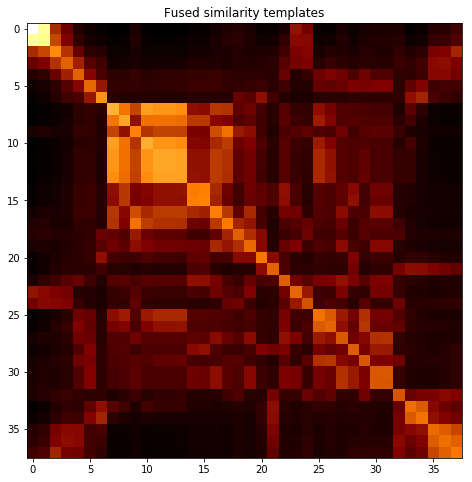

subject 06; gesture 1_1_1


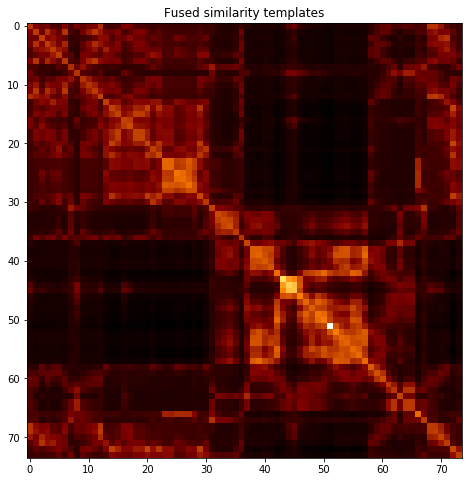

subject 06; gesture 1_0_1


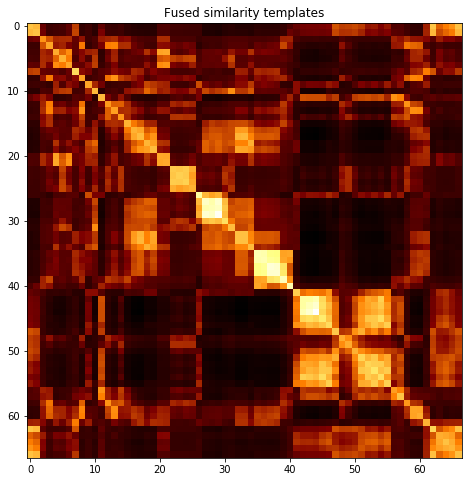

subject 06; gesture 1_0_2


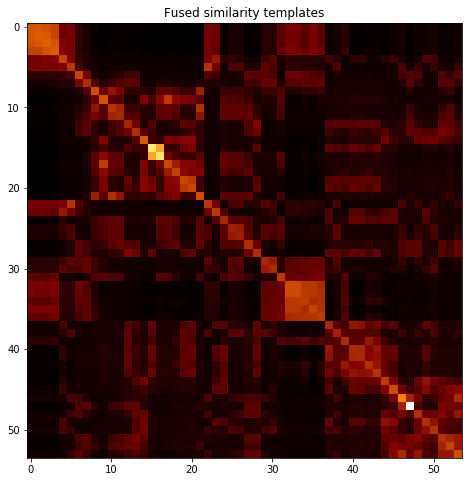

subject 09; gesture 1_1_2


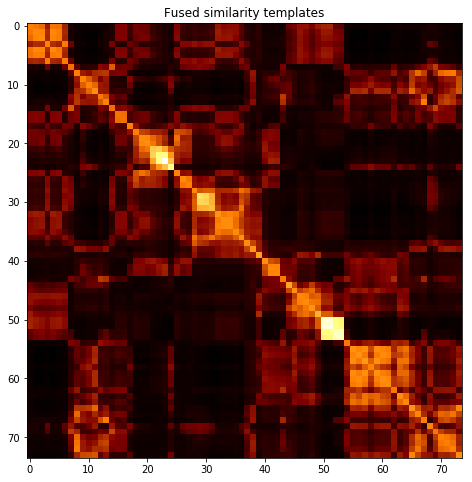

subject 09; gesture 1_1_1


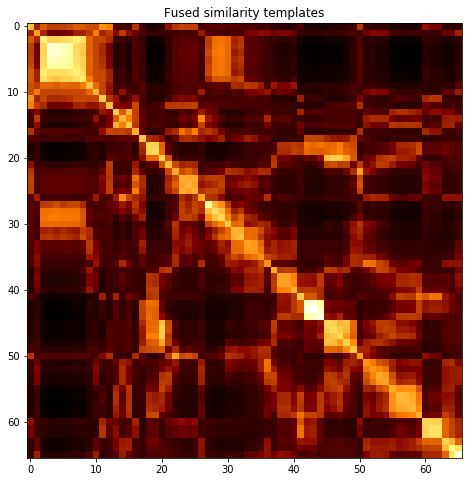

subject 09; gesture 1_0_1


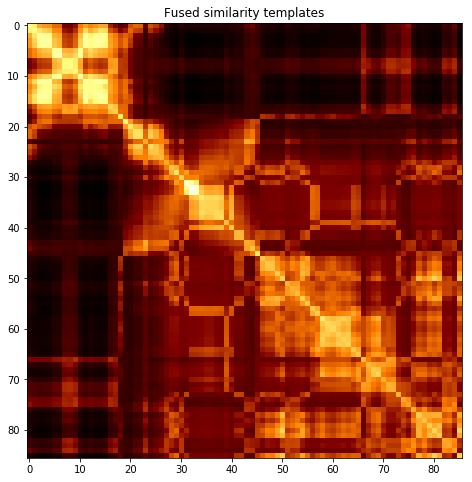

subject 09; gesture 1_0_2


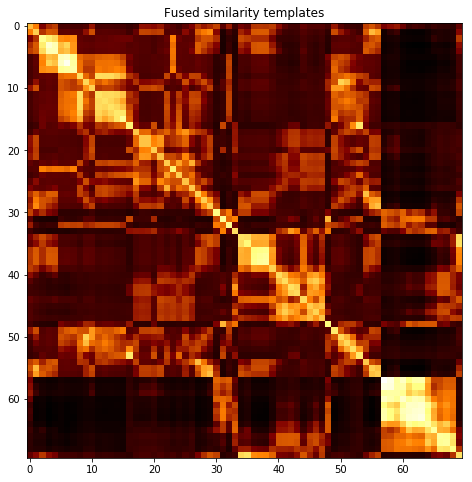

subject 03; gesture 1_1_2


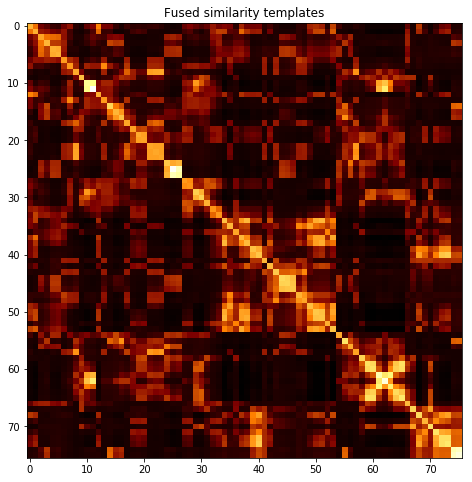

subject 03; gesture 1_1_1


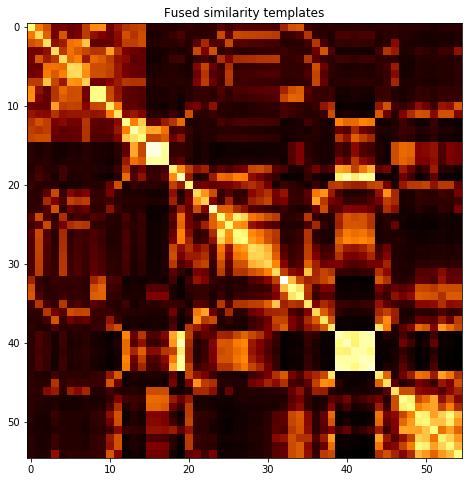

subject 03; gesture 1_0_1


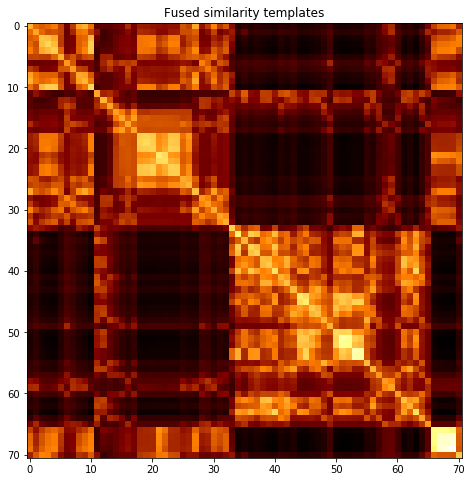

subject 03; gesture 1_0_2


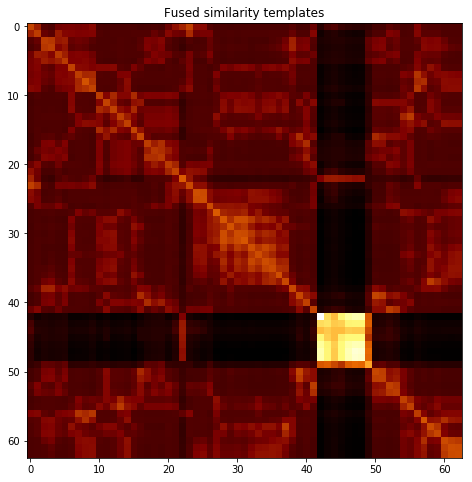

subject 05; gesture 1_1_2


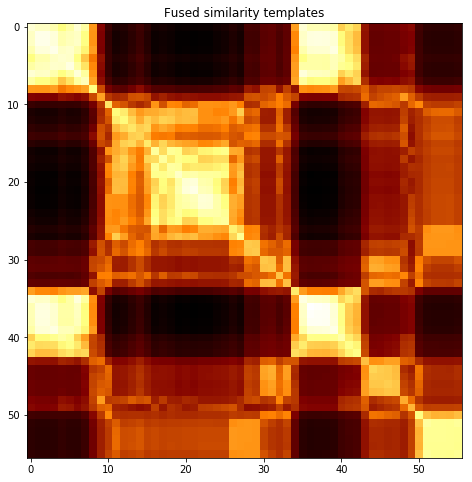

subject 05; gesture 1_1_1


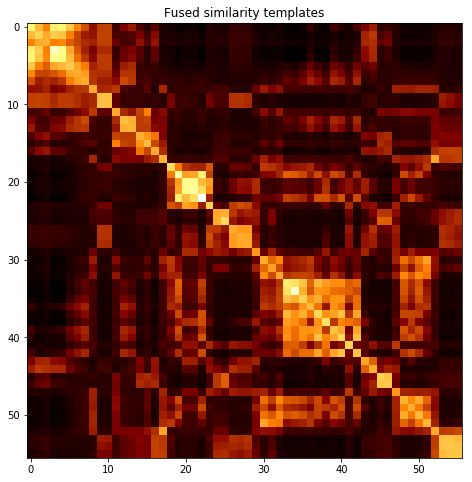

subject 05; gesture 1_0_1


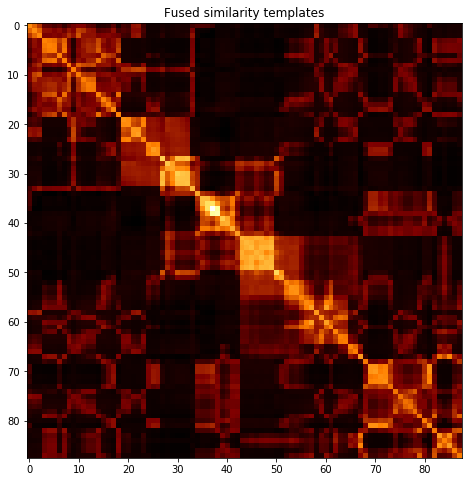

subject 05; gesture 1_0_2


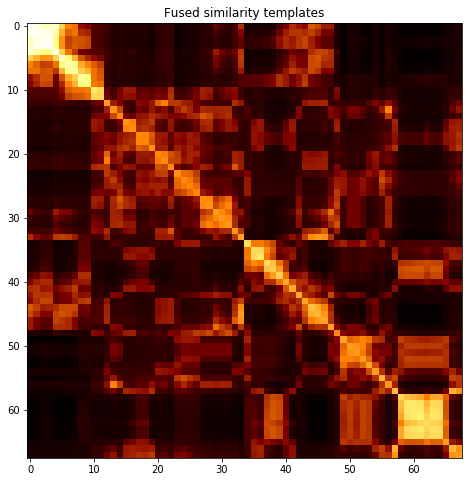

subject 21; gesture 1_1_2


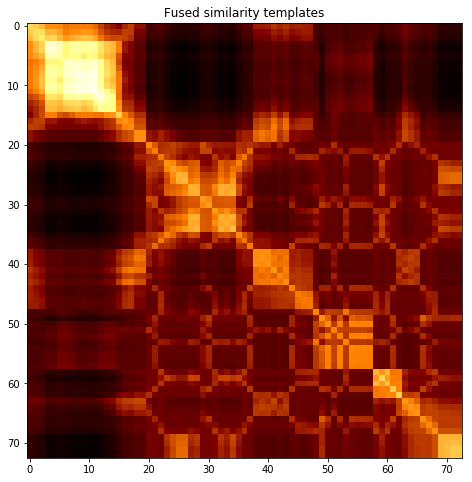

subject 21; gesture 1_1_1


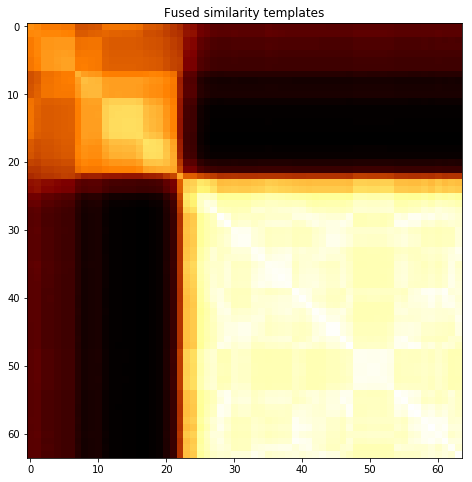

subject 21; gesture 1_0_1


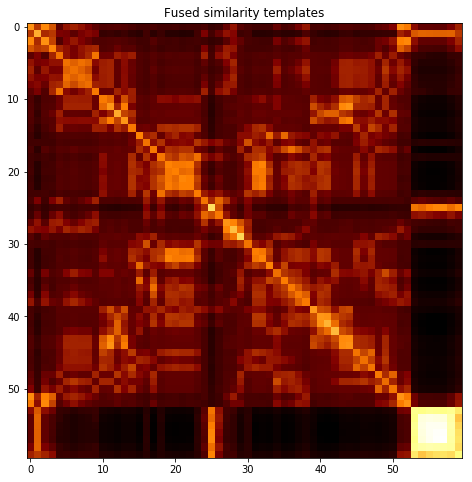

subject 21; gesture 1_0_2


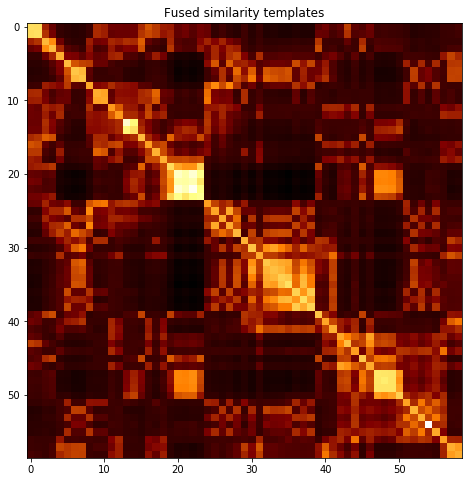

subject 17; gesture 1_1_2


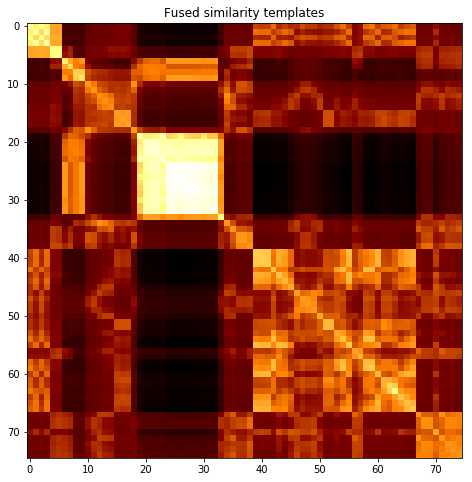

subject 17; gesture 1_1_1


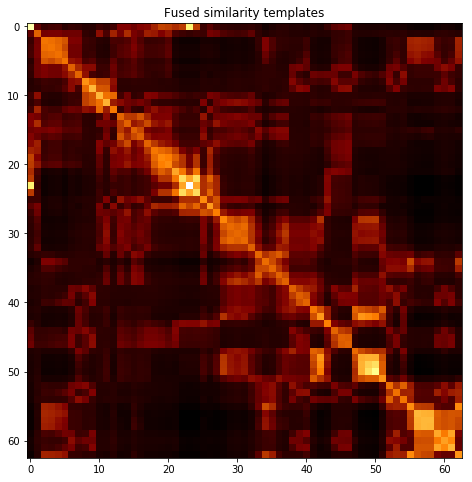

subject 17; gesture 1_0_1


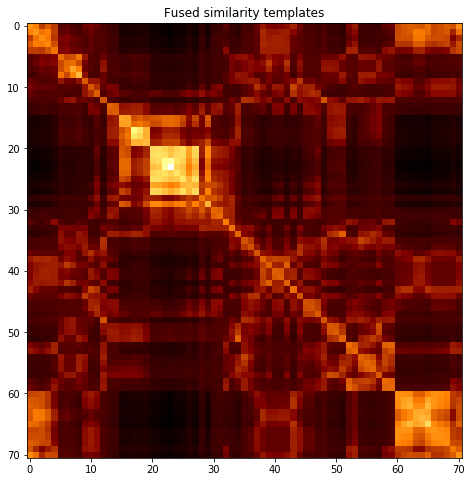

subject 17; gesture 1_0_2


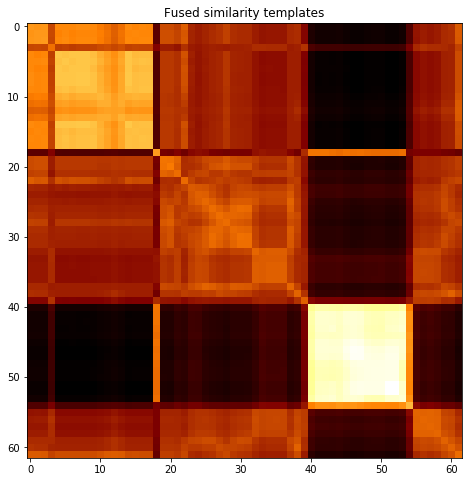

subject 01; gesture 1_1_2


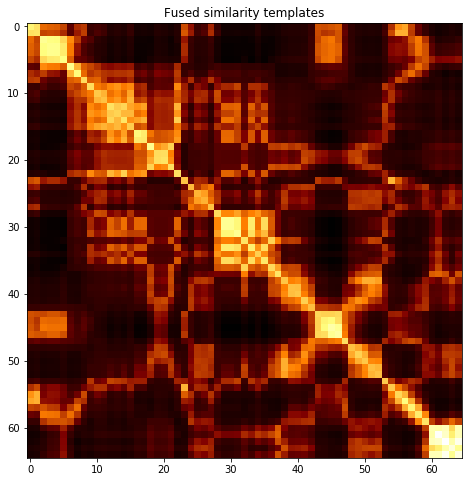

subject 01; gesture 1_1_1


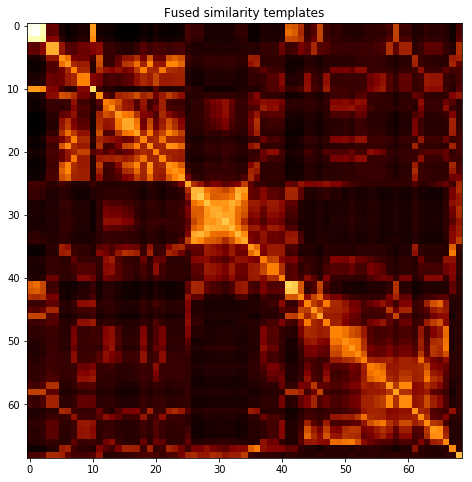

subject 01; gesture 1_0_1


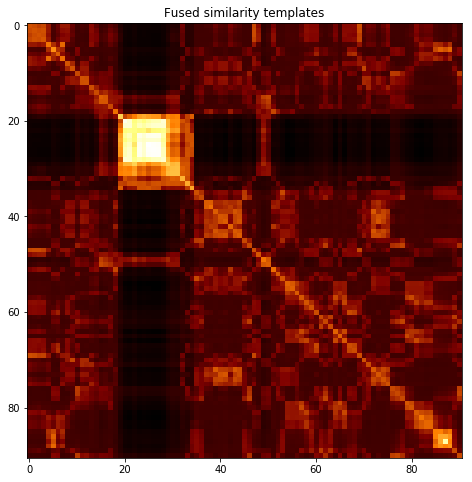

subject 01; gesture 1_0_2


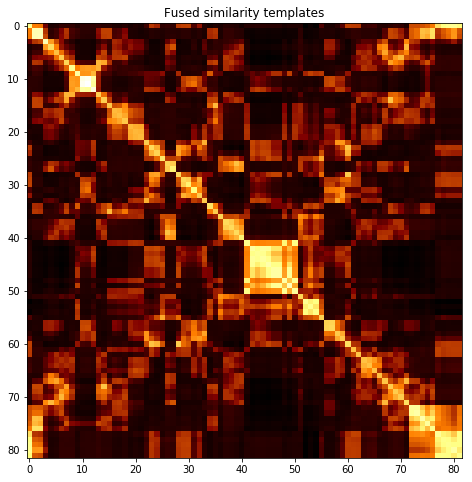

subject 16; gesture 1_1_2


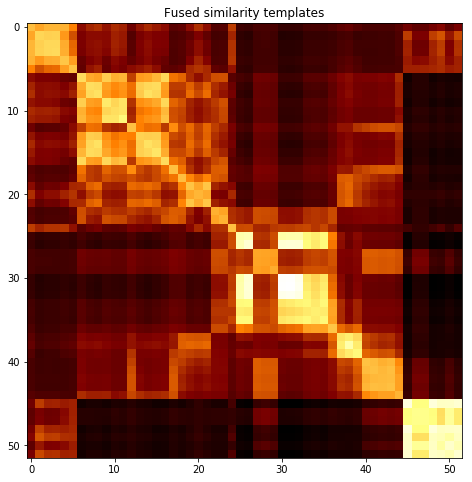

subject 16; gesture 1_1_1


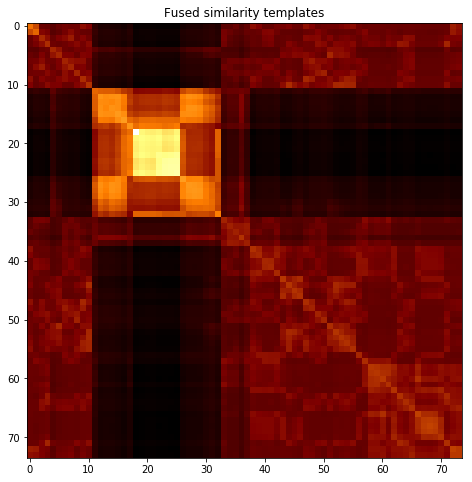

subject 16; gesture 1_0_1


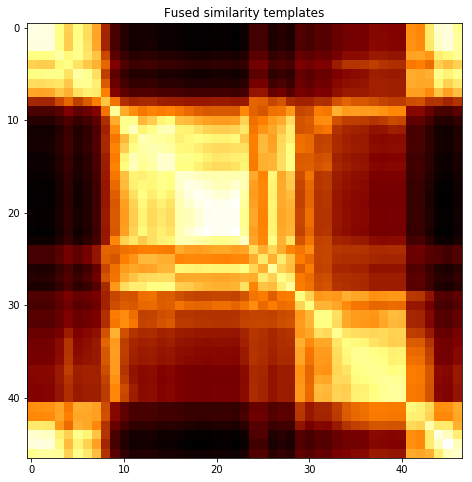

subject 16; gesture 1_0_2


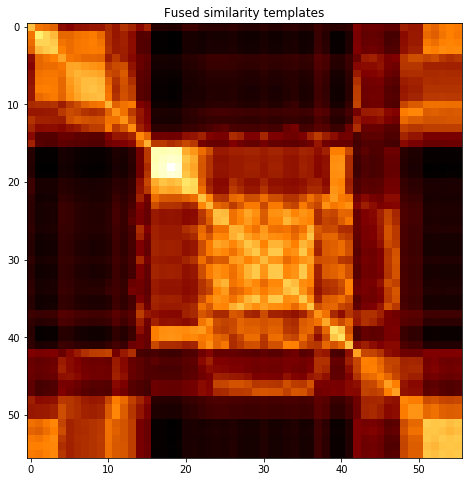

subject 26; gesture 1_1_2


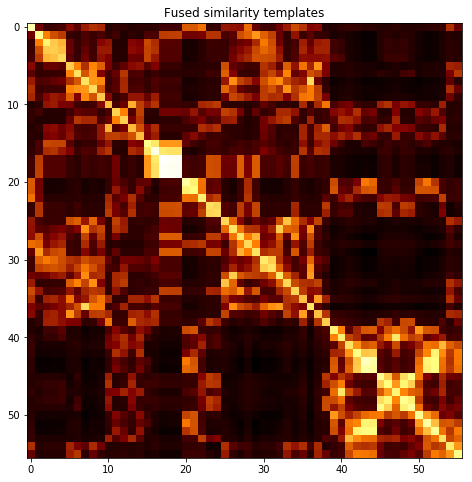

subject 26; gesture 1_1_1


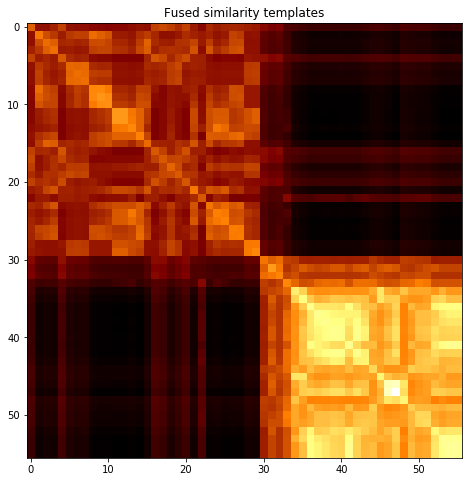

subject 26; gesture 1_0_1


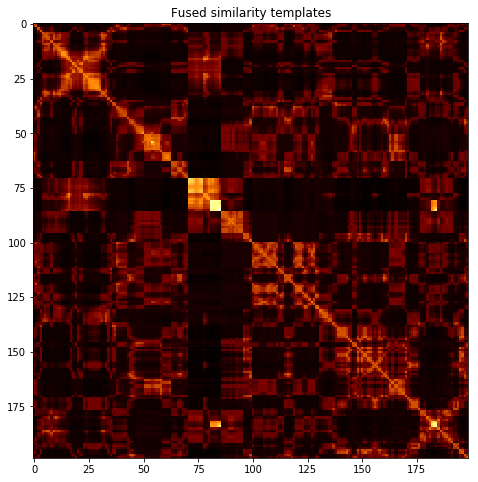

subject 26; gesture 1_0_2


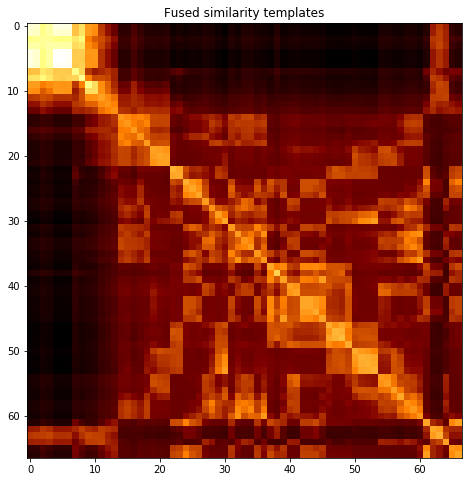

subject 32; gesture 1_1_2


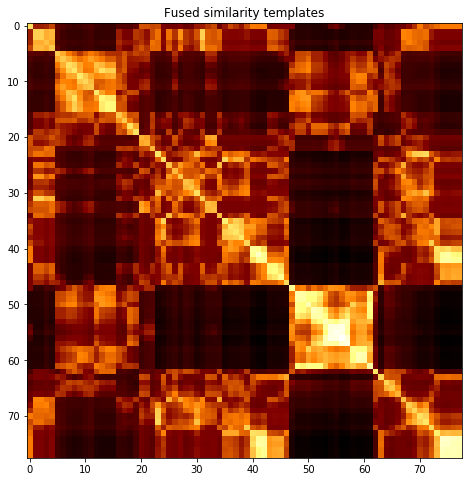

subject 32; gesture 1_1_1


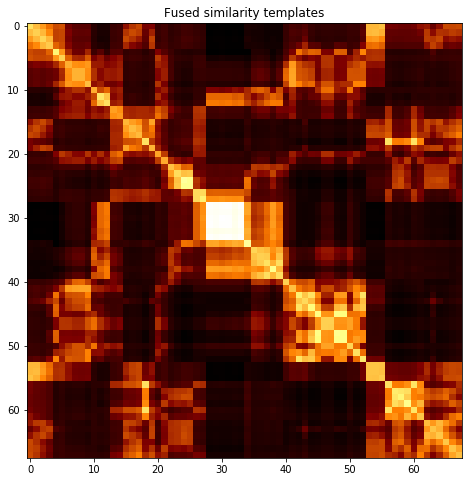

subject 32; gesture 1_0_1


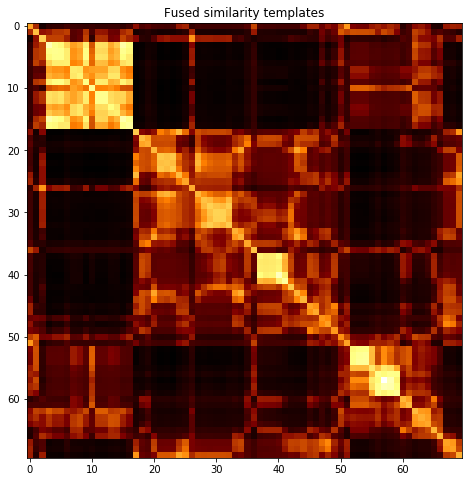

subject 32; gesture 1_0_2


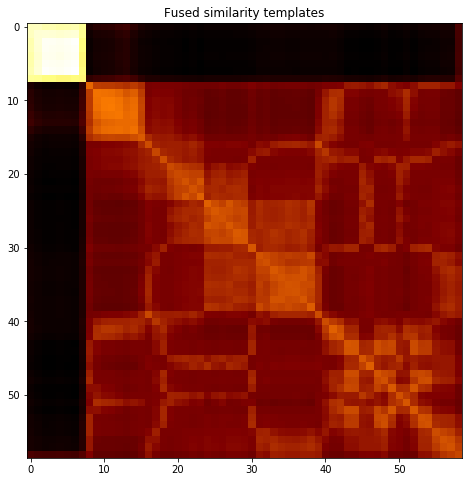

subject 04; gesture 1_1_2


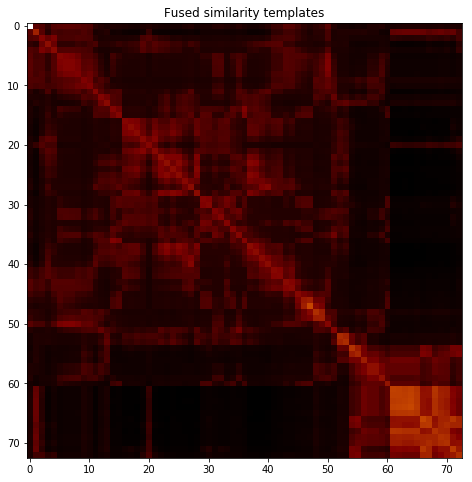

subject 04; gesture 1_1_1


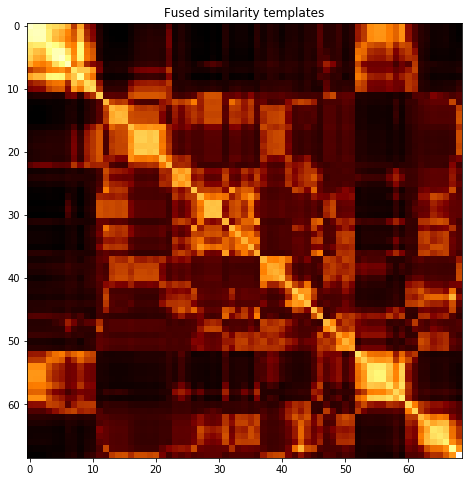

subject 04; gesture 1_0_1


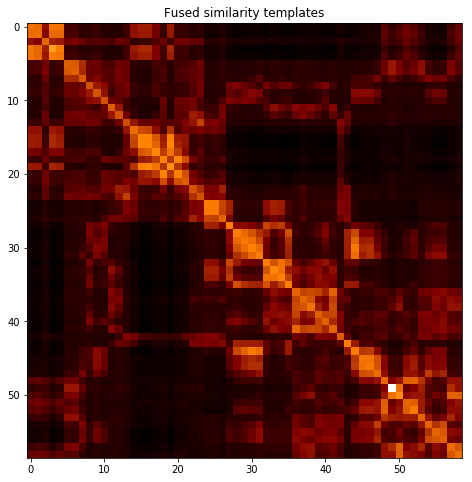

subject 04; gesture 1_0_2


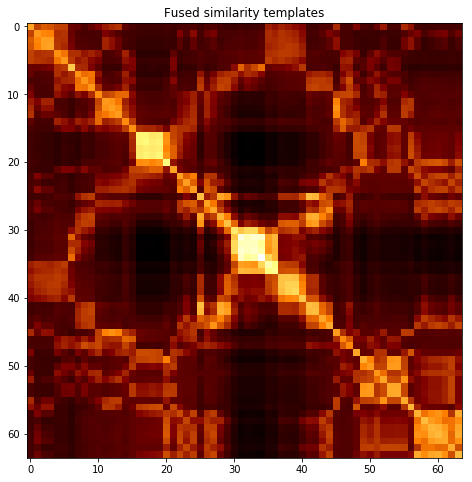

subject 08; gesture 1_1_2


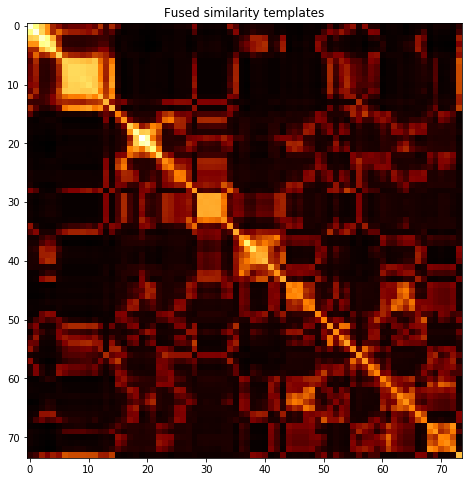

subject 08; gesture 1_1_1


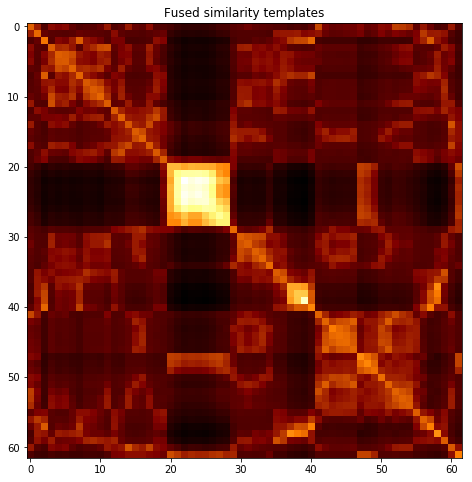

subject 08; gesture 1_0_1


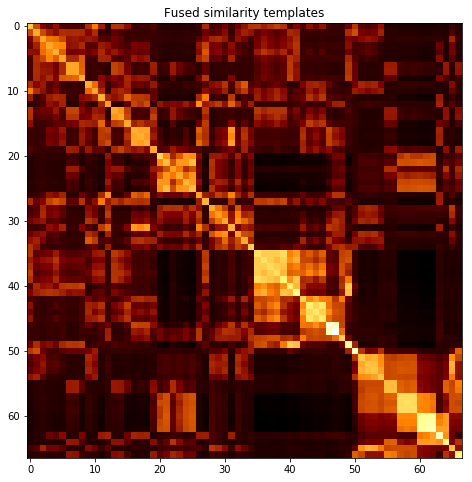

subject 08; gesture 1_0_2


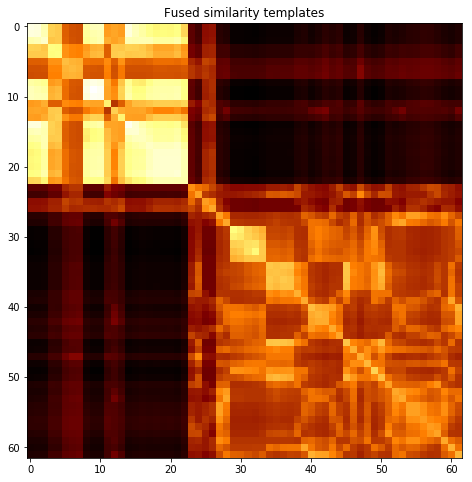

subject 27; gesture 1_1_2


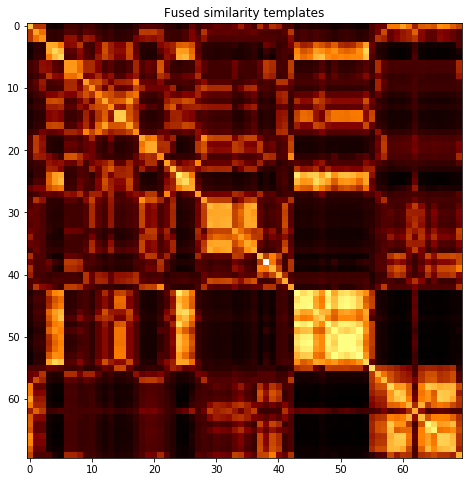

subject 27; gesture 1_1_1


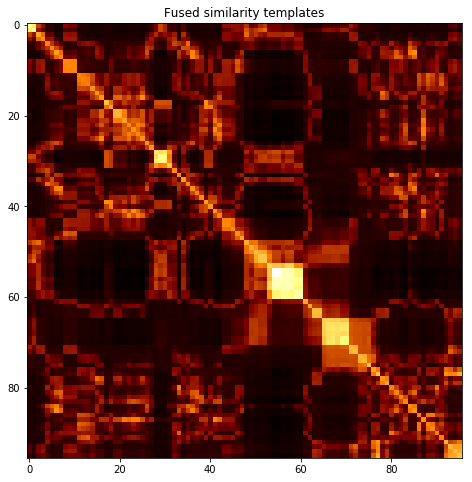

subject 27; gesture 1_0_1


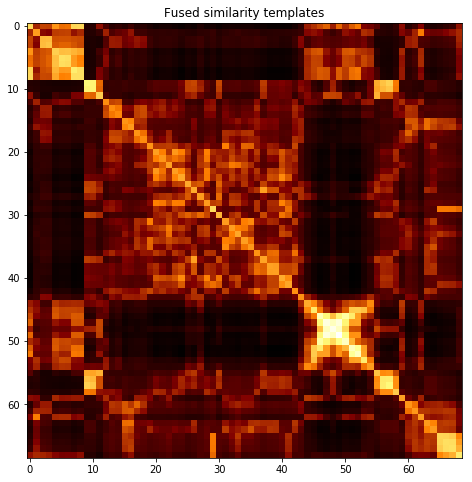

subject 27; gesture 1_0_2


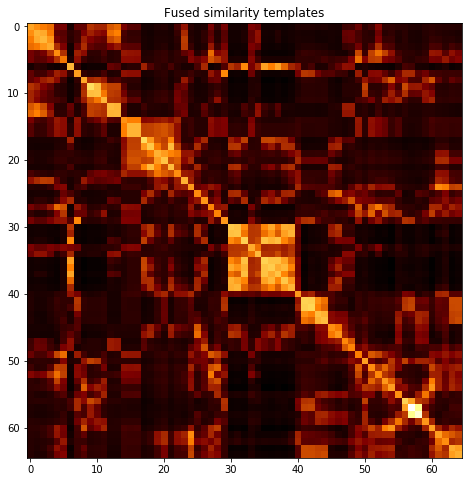

subject 14; gesture 1_1_2


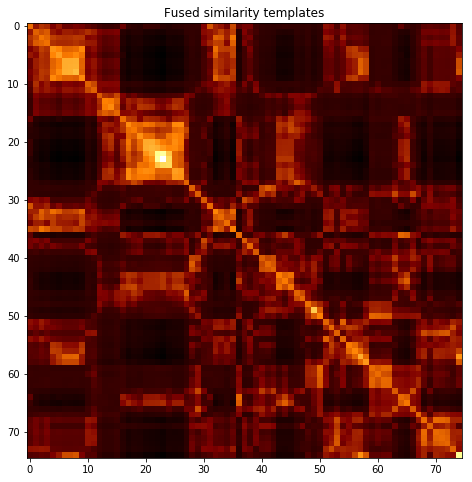

subject 14; gesture 1_1_1


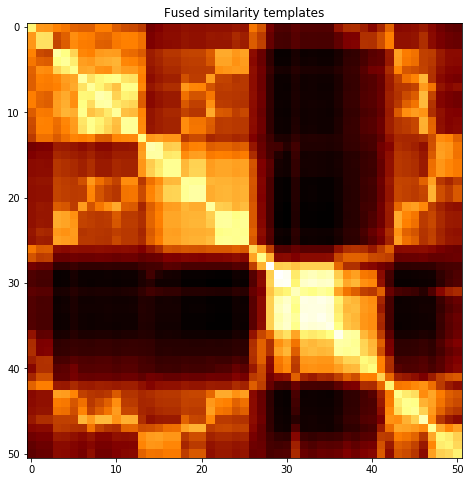

subject 14; gesture 1_0_1


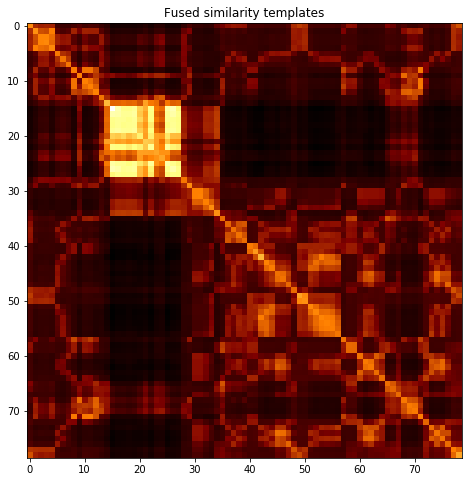

subject 14; gesture 1_0_2


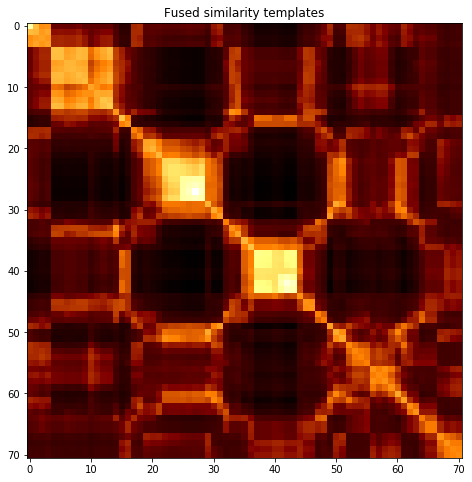

subject 23; gesture 1_1_2


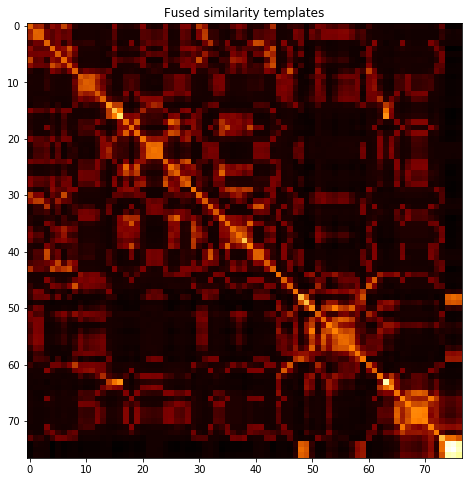

subject 23; gesture 1_1_1


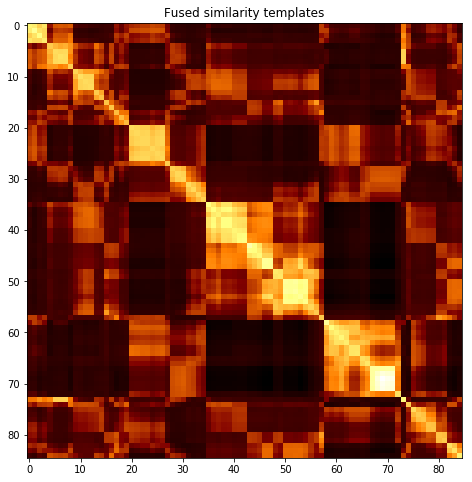

subject 23; gesture 1_0_1


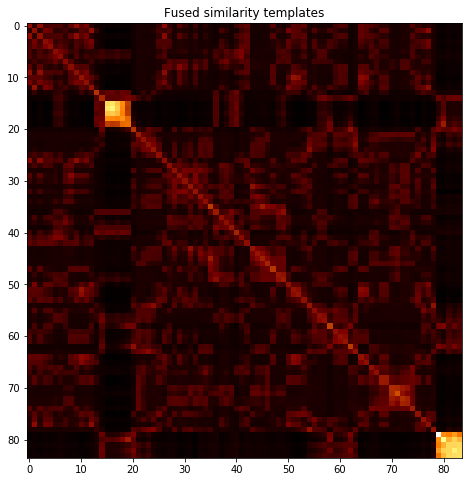

subject 23; gesture 1_0_2


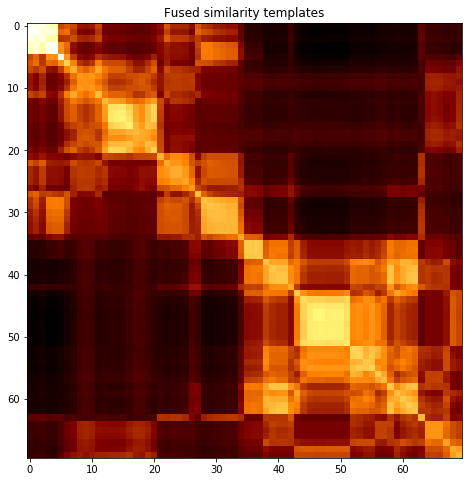

subject 25; gesture 1_1_2


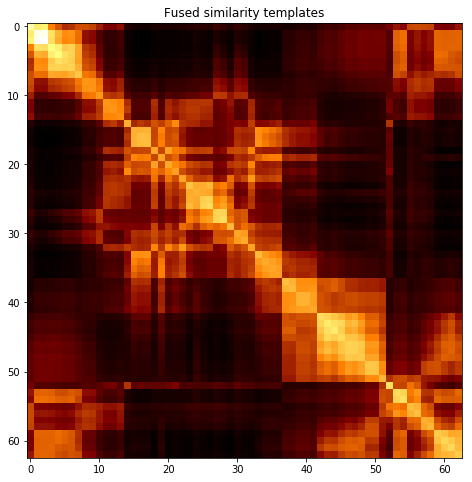

subject 25; gesture 1_1_1


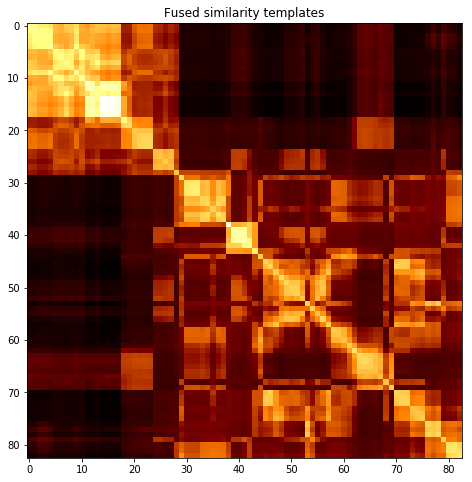

subject 25; gesture 1_0_1


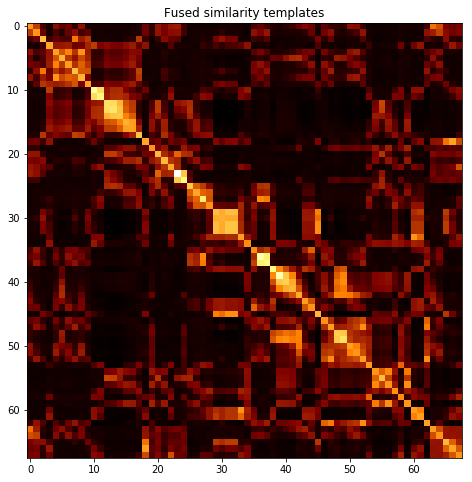

subject 25; gesture 1_0_2


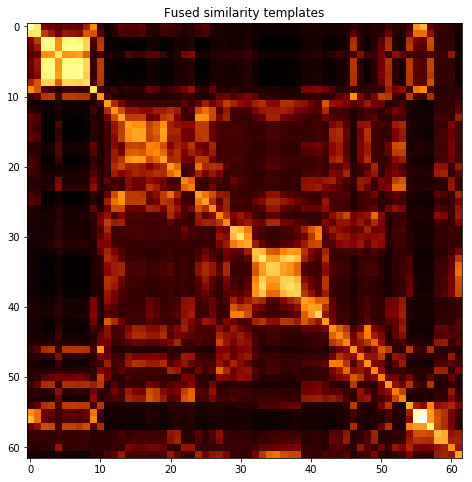

subject 18; gesture 1_1_2


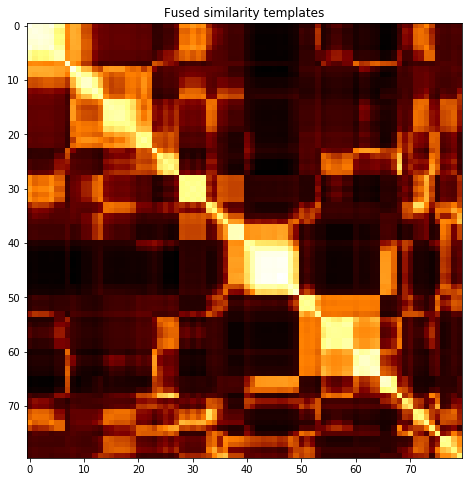

subject 18; gesture 1_1_1


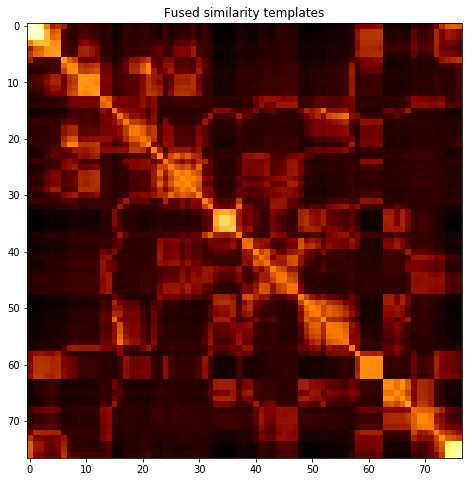

subject 18; gesture 1_0_1


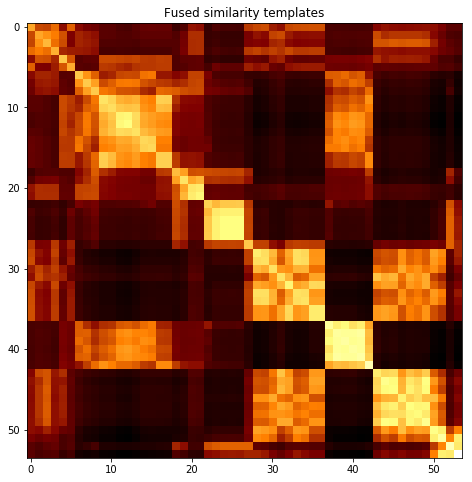

subject 18; gesture 1_0_2


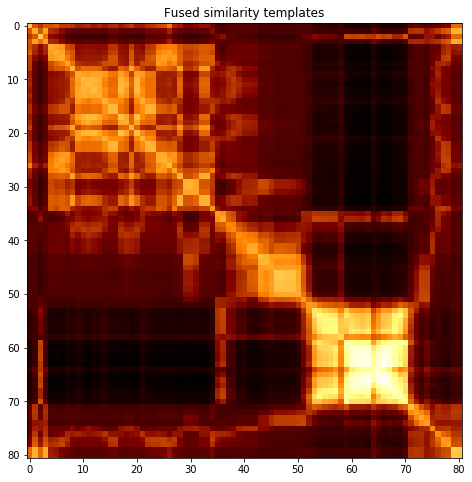

subject 29; gesture 1_1_2


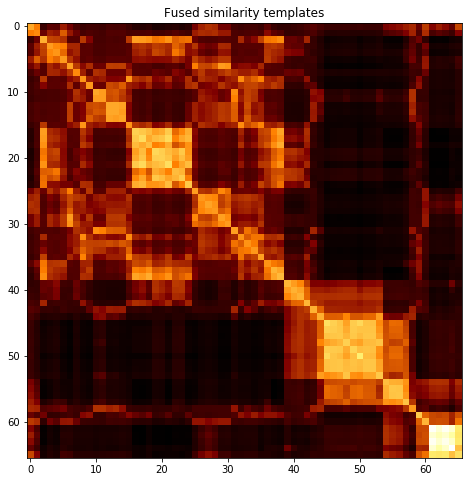

subject 29; gesture 1_1_1


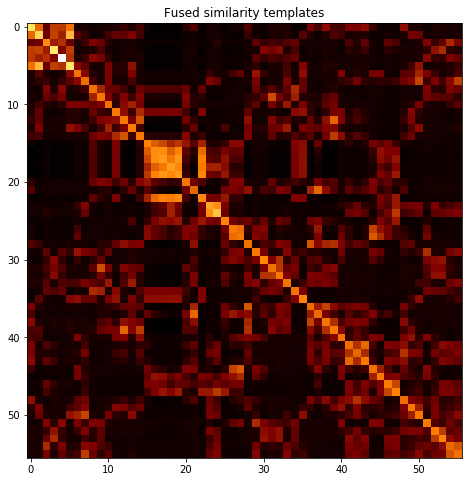

subject 29; gesture 1_0_1


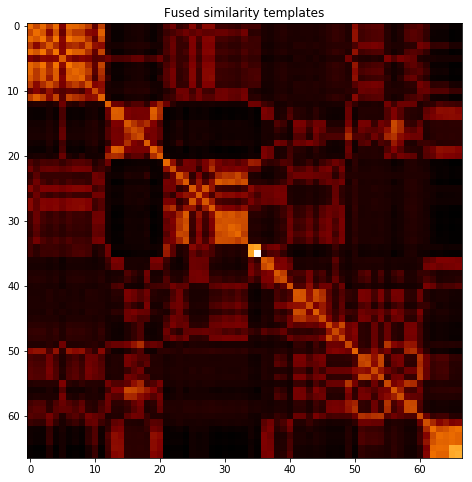

subject 29; gesture 1_0_2


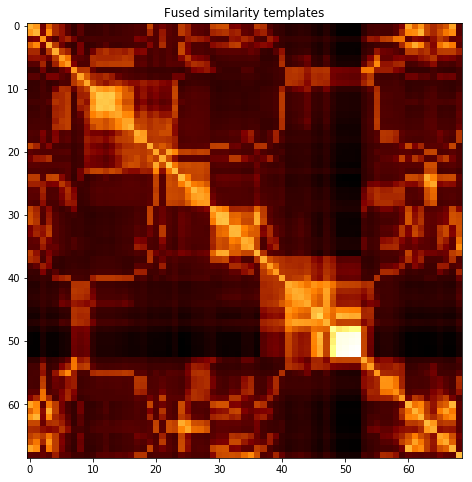

subject 15; gesture 1_1_2


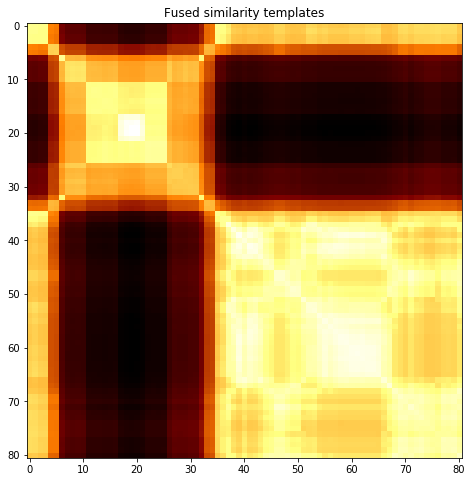

subject 15; gesture 1_1_1


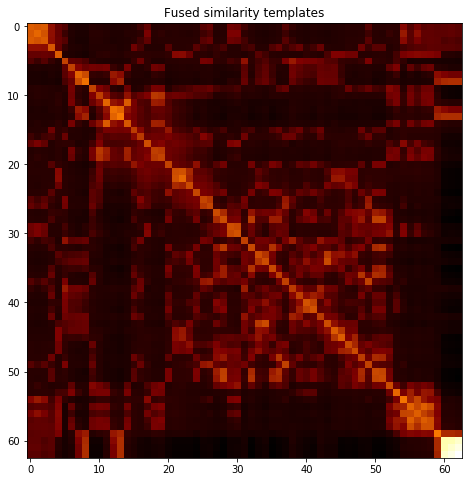

subject 15; gesture 1_0_1


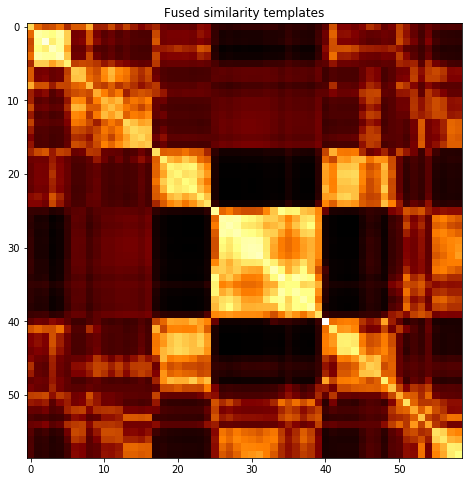

subject 15; gesture 1_0_2


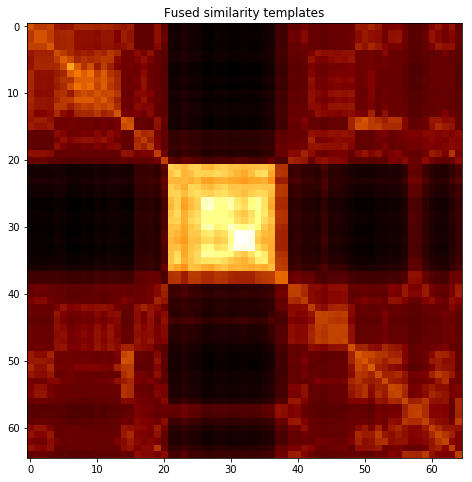

subject 28; gesture 1_1_2


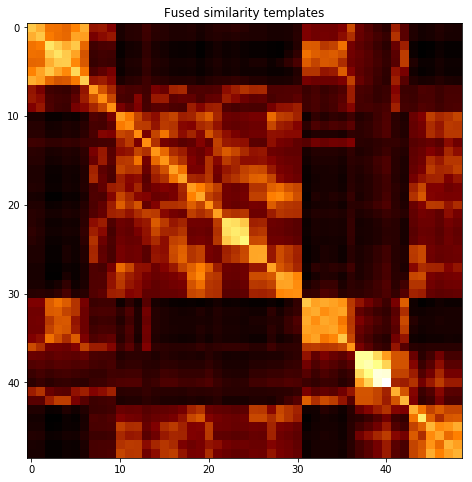

subject 28; gesture 1_1_1


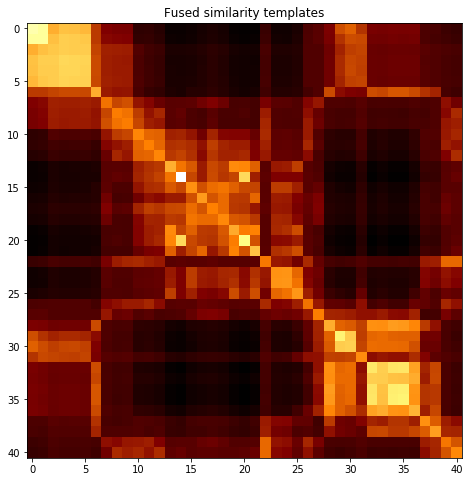

subject 28; gesture 1_0_1


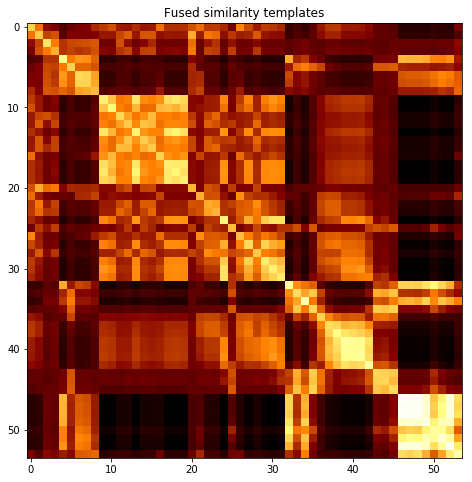

subject 28; gesture 1_0_2


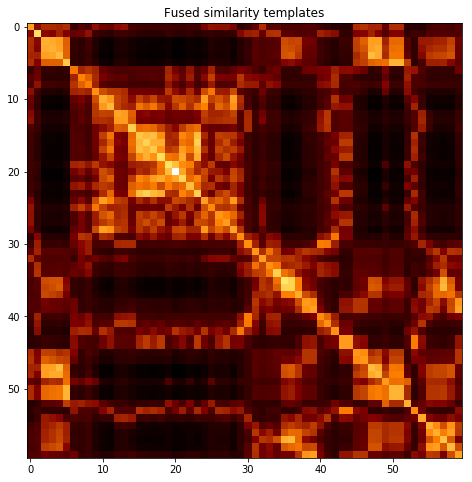

subject 12; gesture 1_1_2


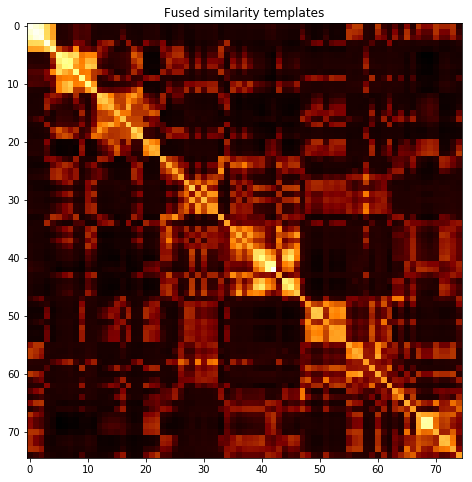

subject 12; gesture 1_1_1


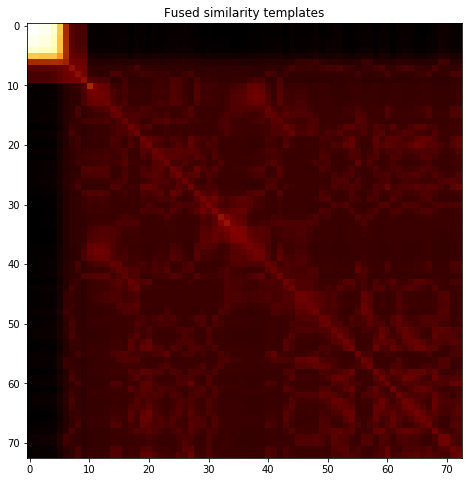

subject 12; gesture 1_0_1


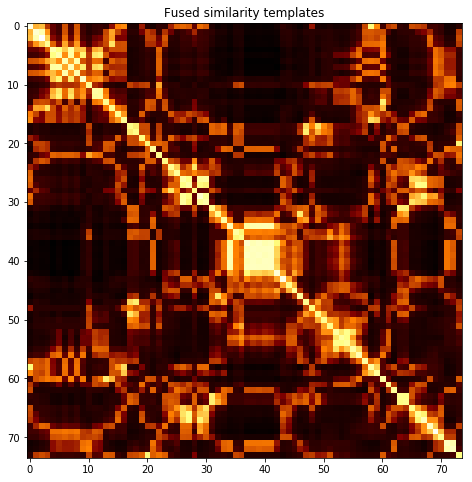

subject 12; gesture 1_0_2


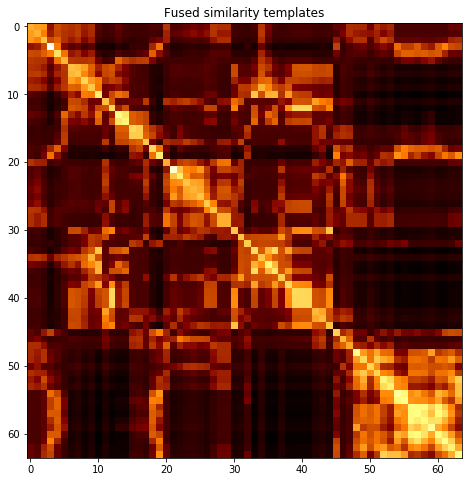

subject 19; gesture 1_1_2


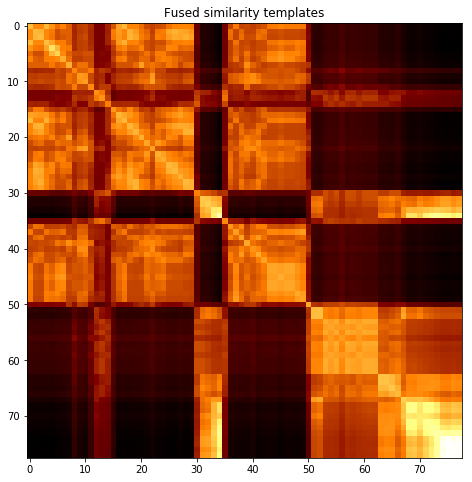

subject 19; gesture 1_1_1


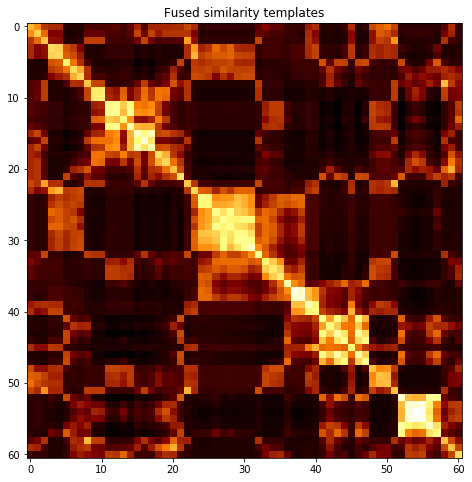

subject 19; gesture 1_0_1


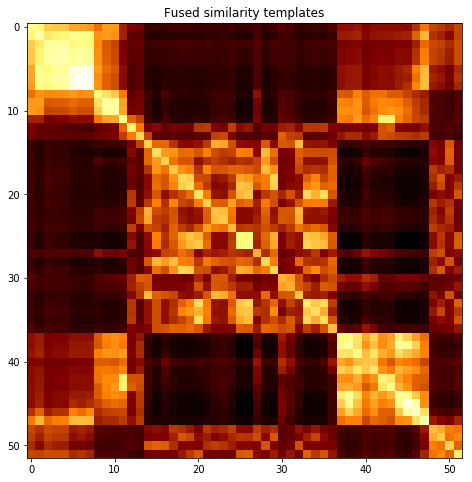

subject 19; gesture 1_0_2


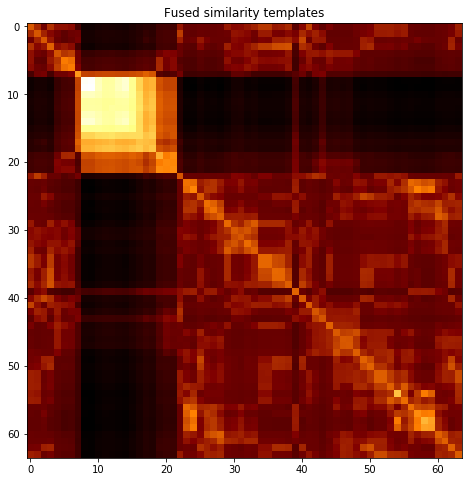

subject 07; gesture 1_1_2


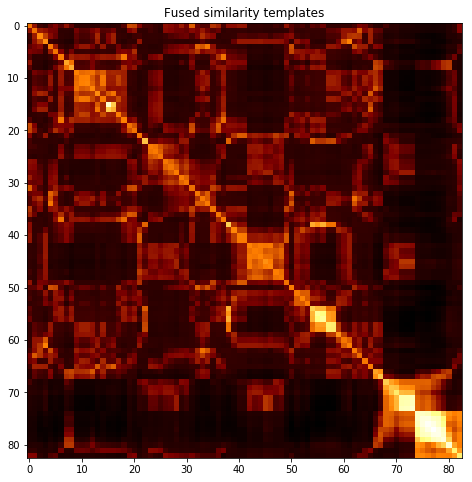

subject 07; gesture 1_1_1


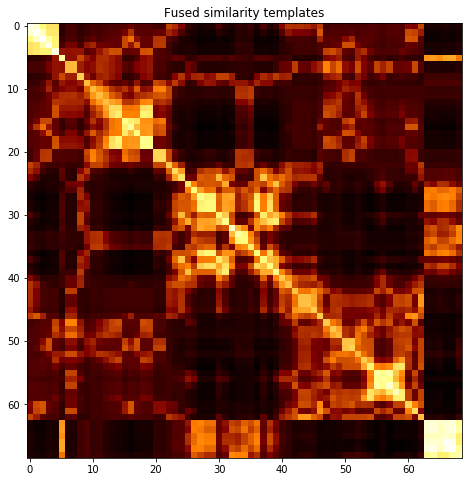

subject 07; gesture 1_0_1


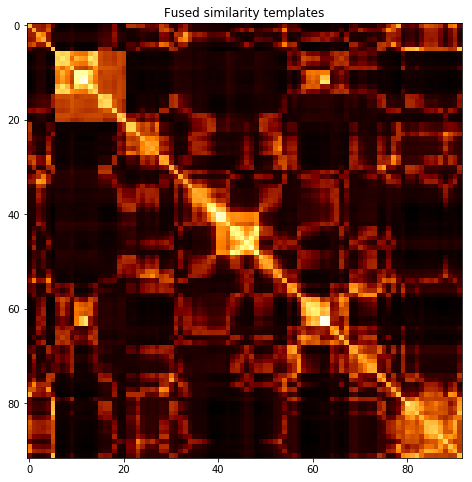

subject 07; gesture 1_0_2


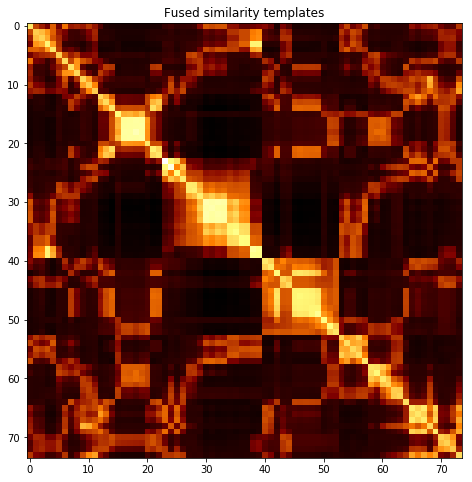

subject 20; gesture 1_1_2


subject 20; gesture 1_1_1


subject 20; gesture 1_0_1


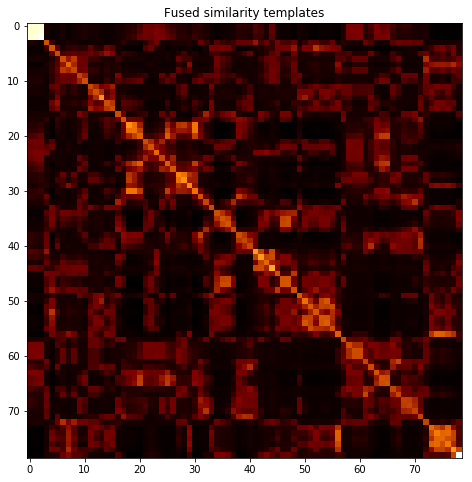

subject 20; gesture 1_0_2


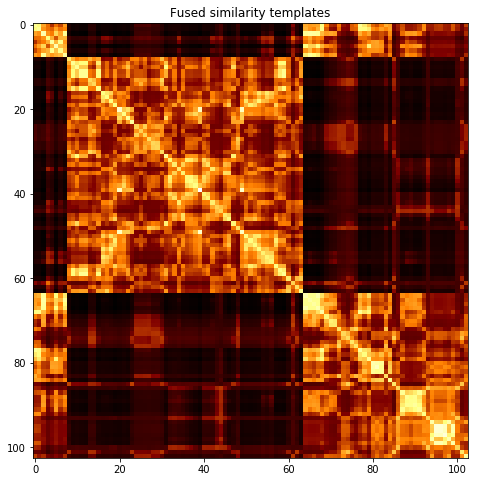

subject 31; gesture 1_1_2


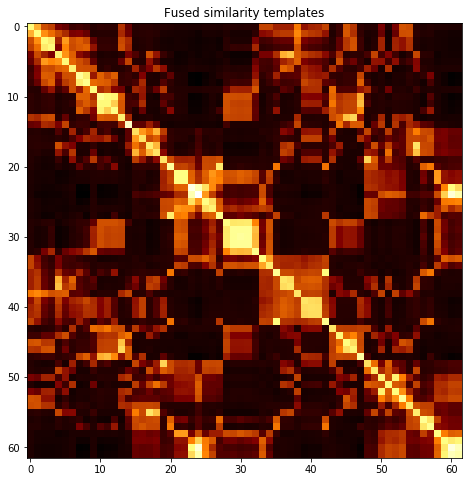

subject 31; gesture 1_1_1


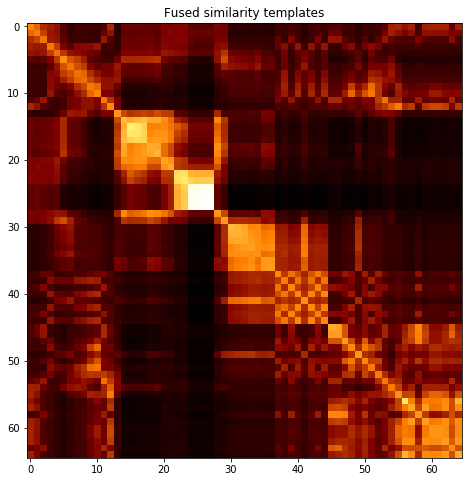

subject 31; gesture 1_0_1


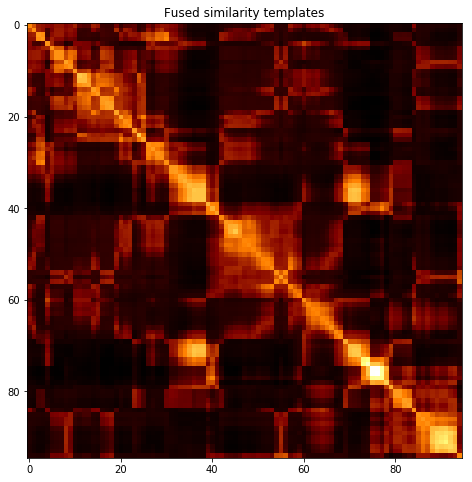

subject 31; gesture 1_0_2


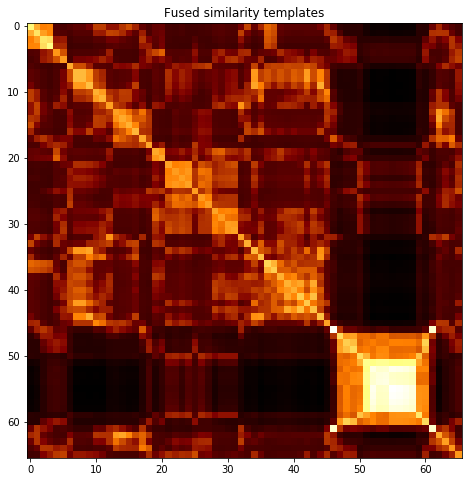

subject 13; gesture 1_1_2


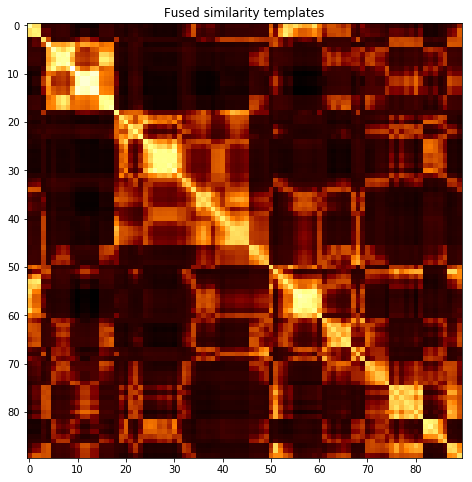

subject 13; gesture 1_1_1


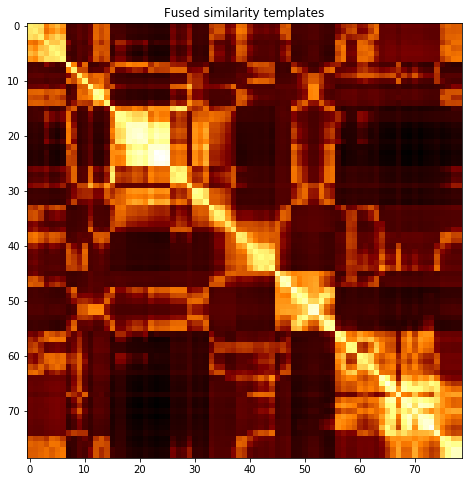

subject 13; gesture 1_0_1


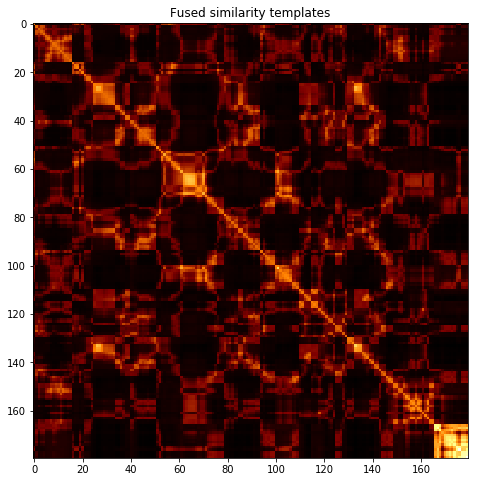

subject 13; gesture 1_0_2


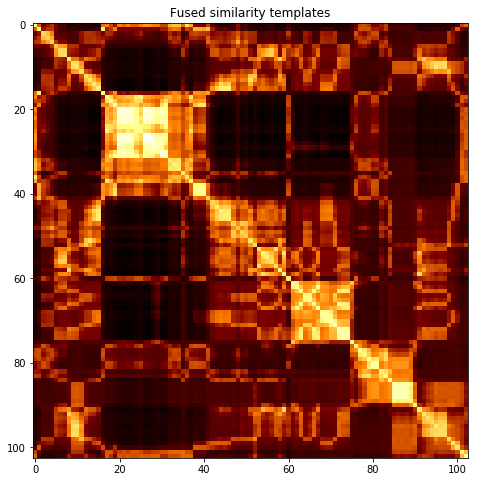

subject 36; gesture 1_1_2


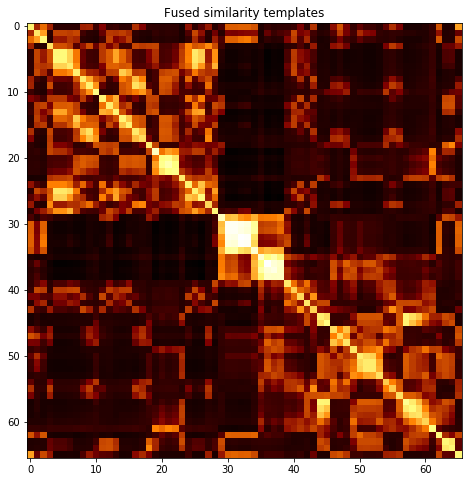

subject 36; gesture 1_1_1


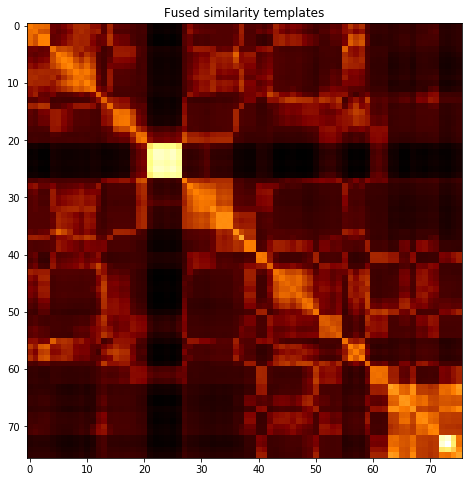

subject 36; gesture 1_0_1


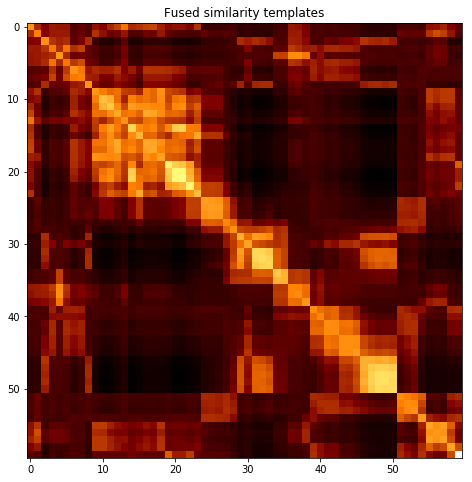

subject 36; gesture 1_0_2


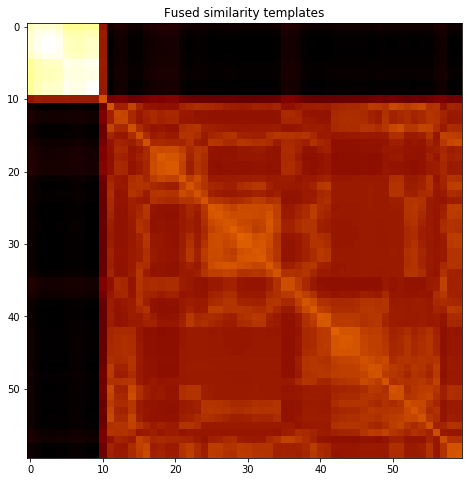

subject 24; gesture 1_1_2


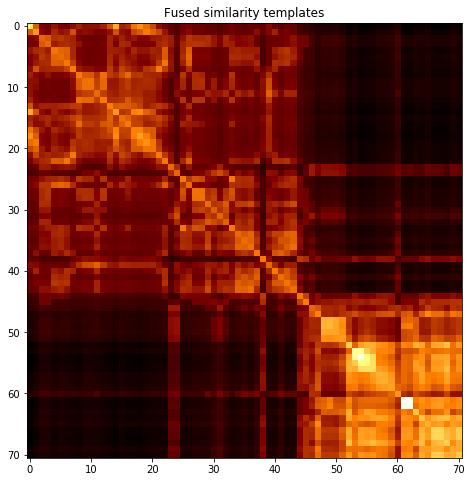

subject 24; gesture 1_1_1


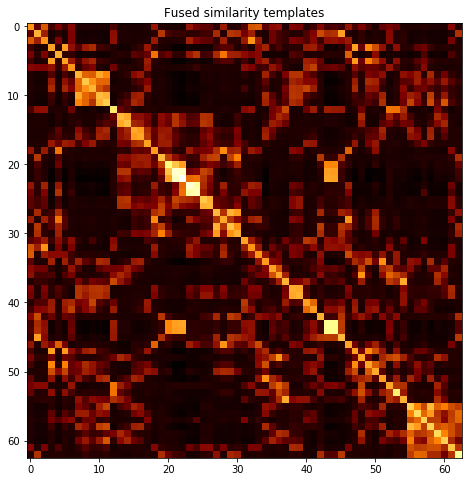

subject 24; gesture 1_0_1


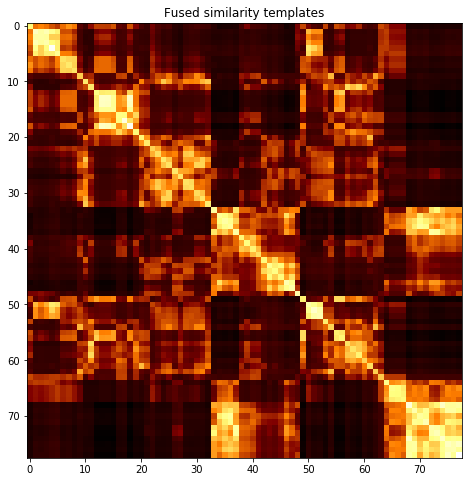

subject 24; gesture 1_0_2


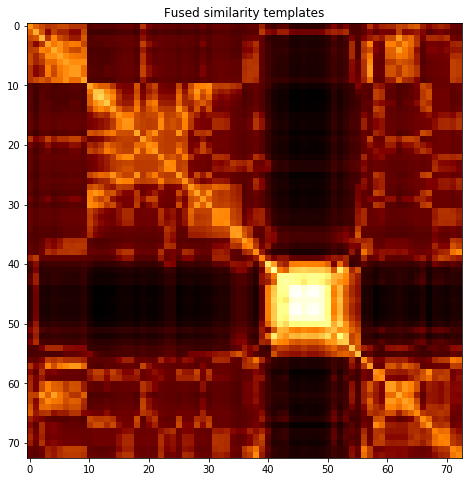

subject 33; gesture 1_1_2


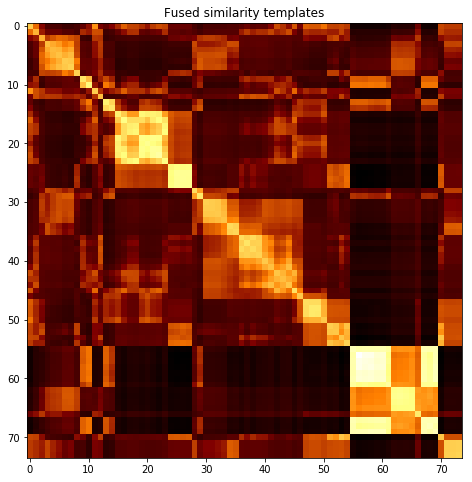

subject 33; gesture 1_1_1


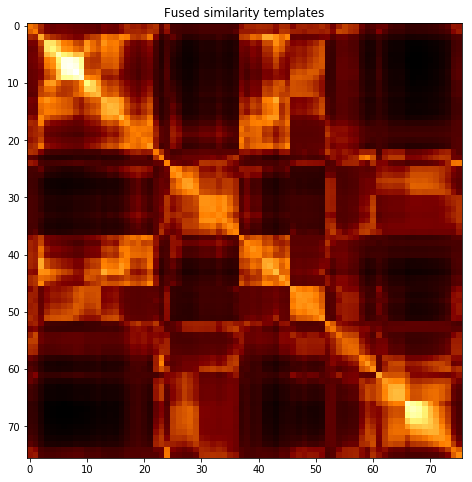

subject 33; gesture 1_0_1


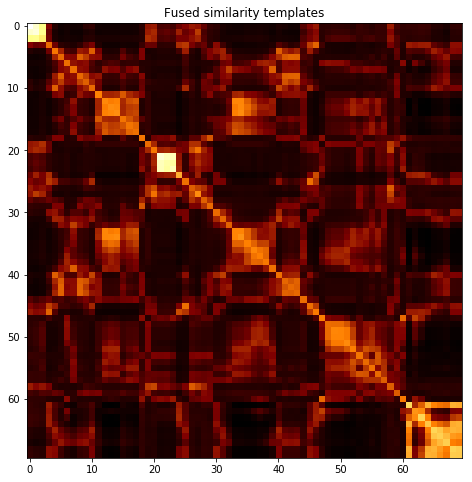

subject 33; gesture 1_0_2


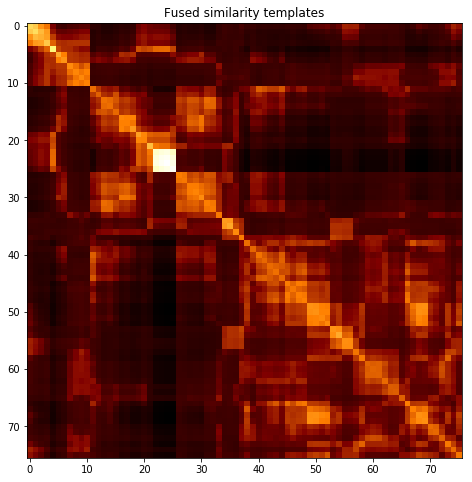

subject 11; gesture 1_1_2


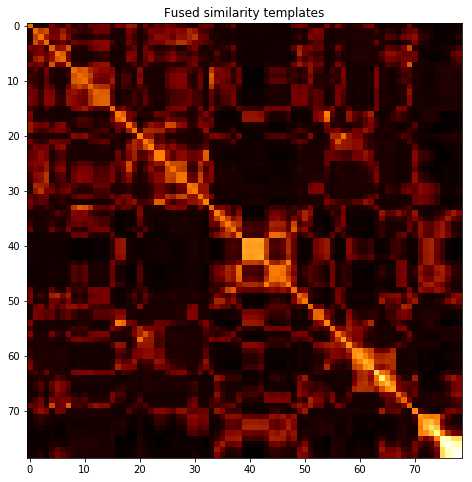

subject 11; gesture 1_1_1


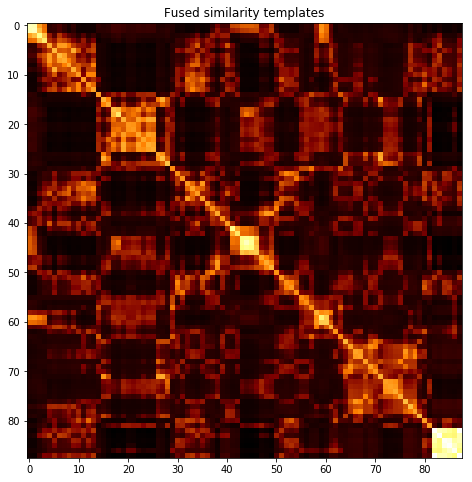

subject 11; gesture 1_0_1


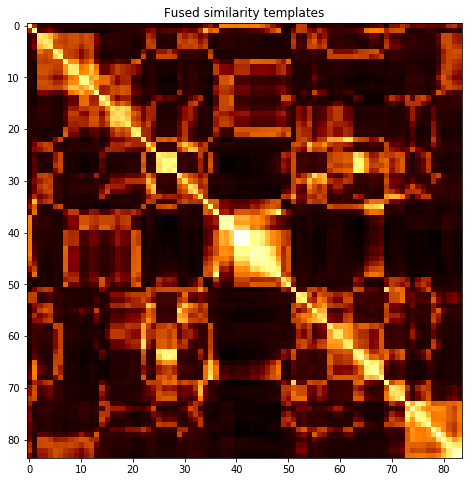

subject 11; gesture 1_0_2


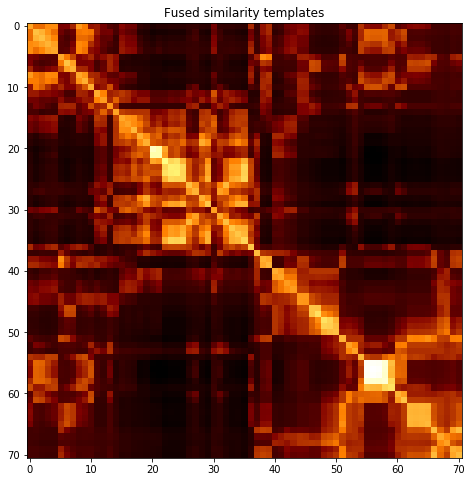

subject 35; gesture 1_1_2


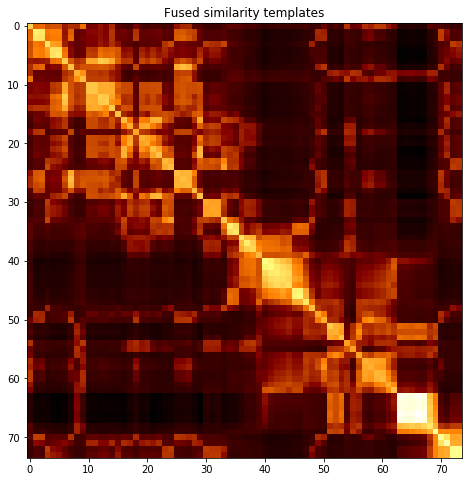

subject 35; gesture 1_1_1


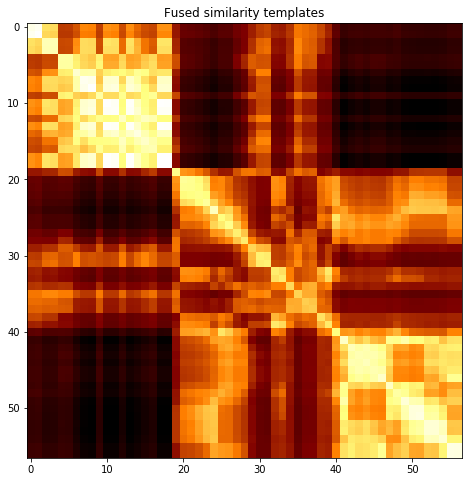

subject 35; gesture 1_0_1


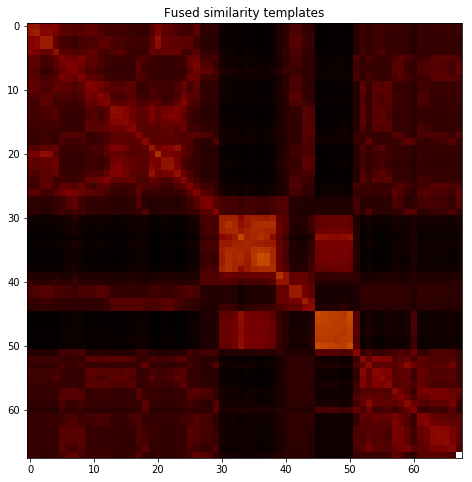

subject 35; gesture 1_0_2


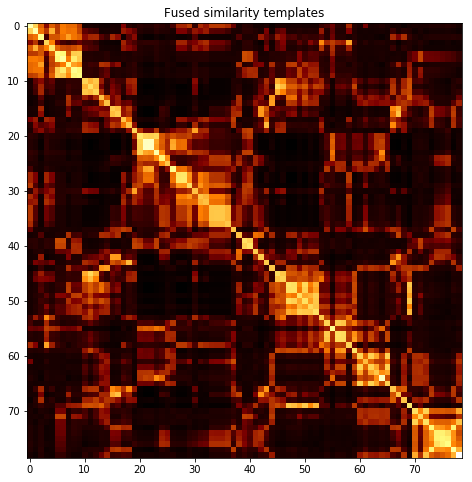

subject 22; gesture 1_1_2


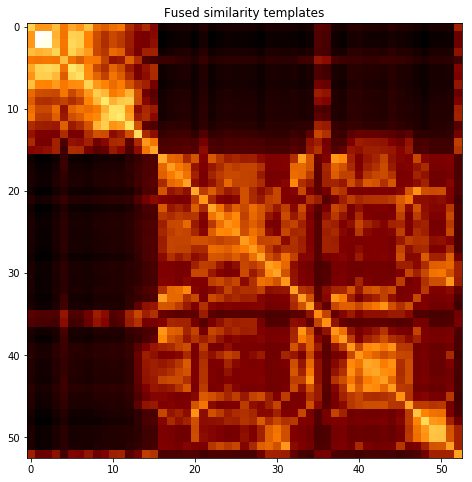

subject 22; gesture 1_1_1


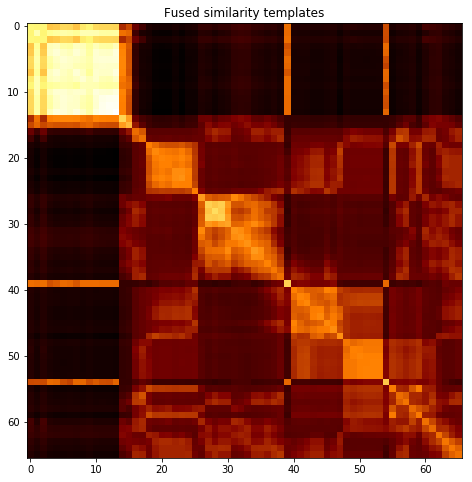

subject 22; gesture 1_0_1


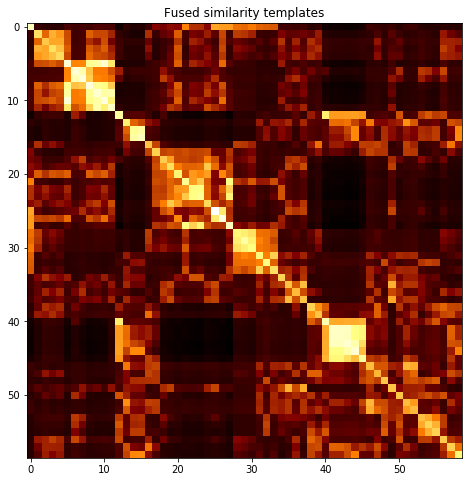

subject 22; gesture 1_0_2


subject 34; gesture 1_1_2


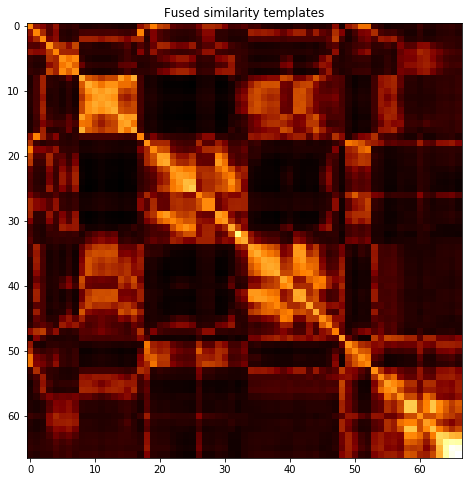

subject 34; gesture 1_1_1


subject 34; gesture 1_0_1


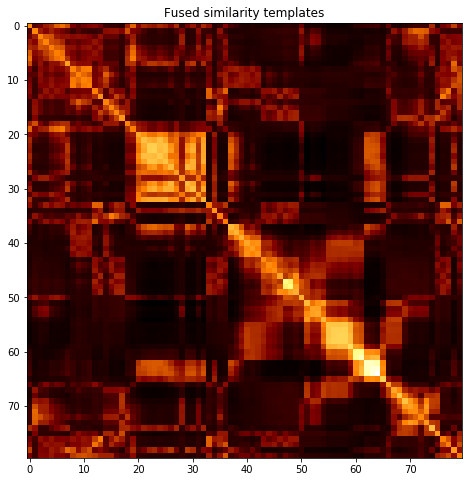

subject 34; gesture 1_0_2


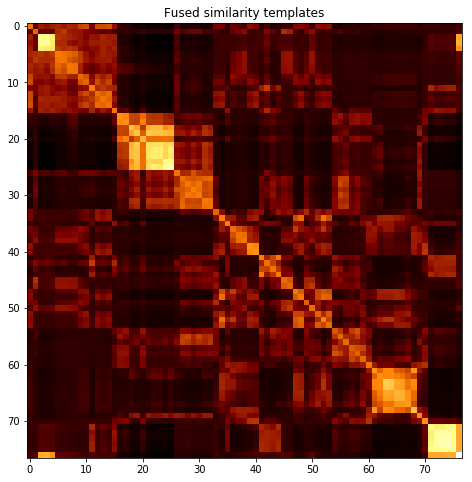

subject 10; gesture 1_1_2


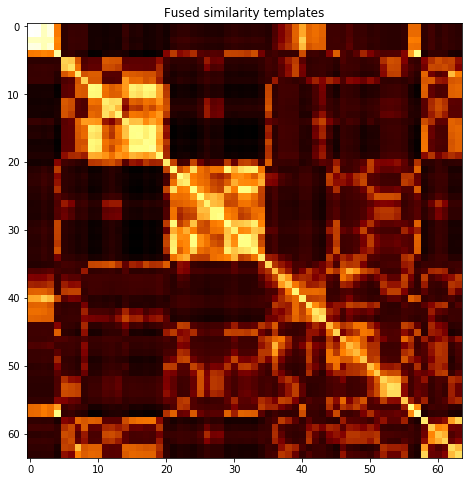

subject 10; gesture 1_1_1


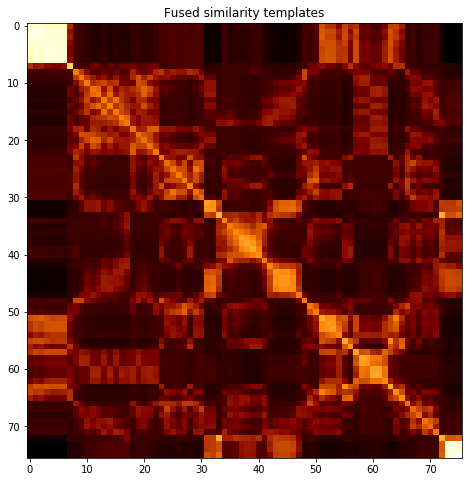

subject 10; gesture 1_0_1


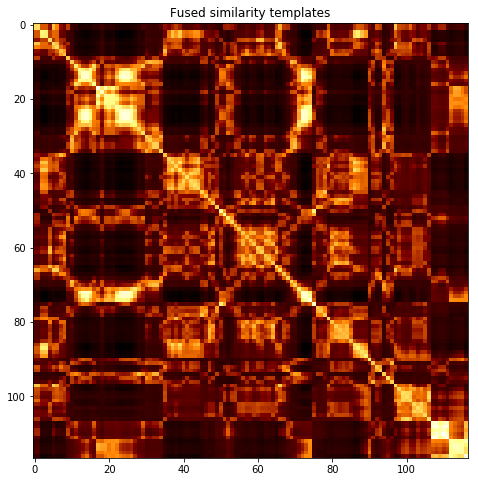

subject 10; gesture 1_0_2


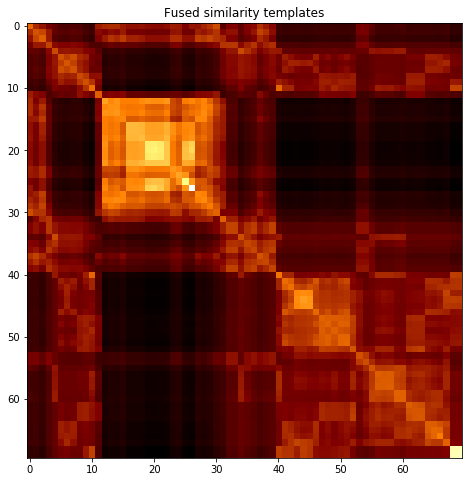

subject 02; gesture 1_1_2


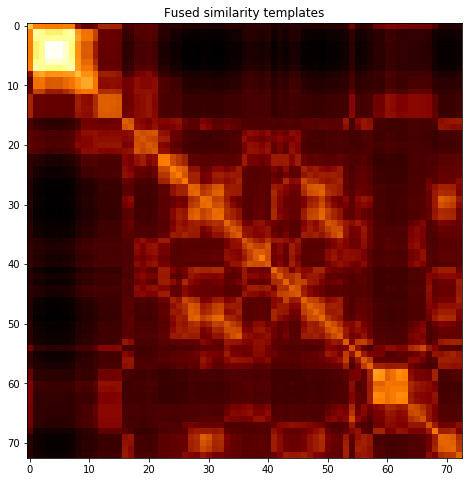

subject 02; gesture 1_1_1


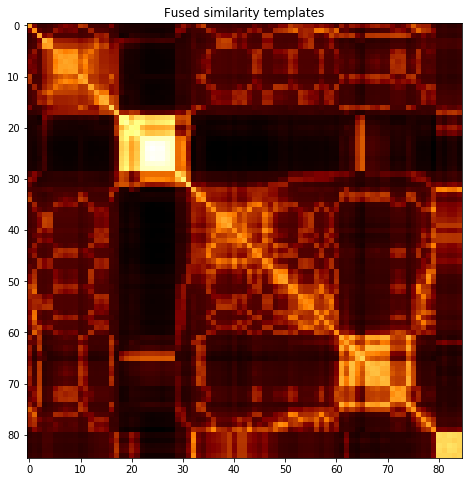

subject 02; gesture 1_0_1


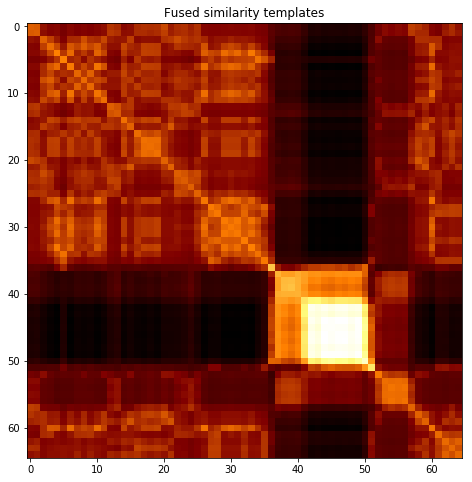

subject 02; gesture 1_0_2


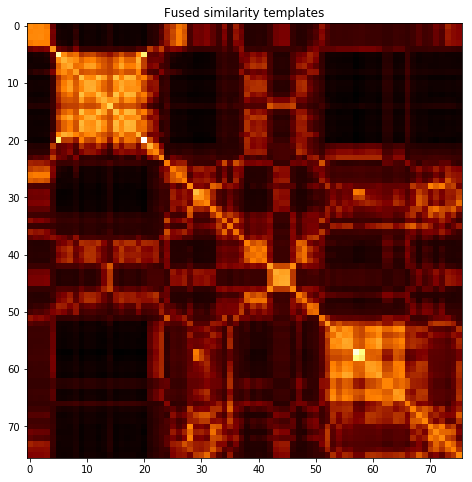

In [4]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.4660545415571957; sd 0.02005652012048965
subject 30; gesture 1_1_2; PoV: 0.8778058448228457


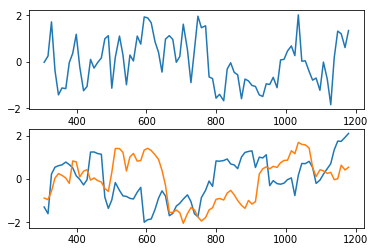

subject 30; gesture 1_1_1; avg 0.5016699600308838; sd 0.03915998524195403
subject 30; gesture 1_1_1; PoV: 0.8399128924799073


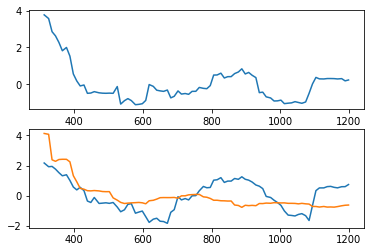

subject 30; gesture 1_0_1; avg 0.45859927271711687; sd 0.048886231032100914
subject 30; gesture 1_0_1; PoV: 0.8240187791190705


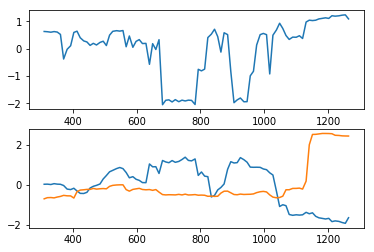

subject 30; gesture 1_0_2; avg 0.5531368762150599; sd 0.04451755739212151
subject 30; gesture 1_0_2; PoV: 0.8457836669352659


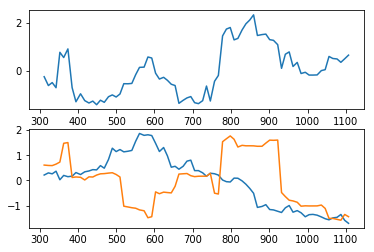

subject 06; gesture 1_1_2; avg 1.1889886063743778; sd 0.0688312276543112
subject 06; gesture 1_1_2; PoV: 0.864457435678714


subject 06; gesture 1_1_1; avg 0.5515996398939036; sd 0.034892806051481345
subject 06; gesture 1_1_1; PoV: 0.8483578837313225


subject 06; gesture 1_0_1; avg 0.6120410618253462; sd 0.03827210995654912
subject 06; gesture 1_0_1; PoV: 0.8485799645060714


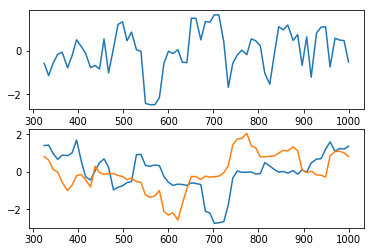

subject 06; gesture 1_0_2; avg 0.7497215763124706; sd 0.03787621703657048
subject 06; gesture 1_0_2; PoV: 0.8567888055271291


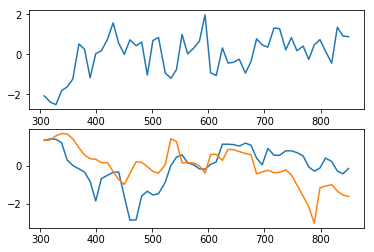

subject 09; gesture 1_1_2; avg 0.5587514857545774; sd 0.028073831887425304
subject 09; gesture 1_1_2; PoV: 0.8634851576790259


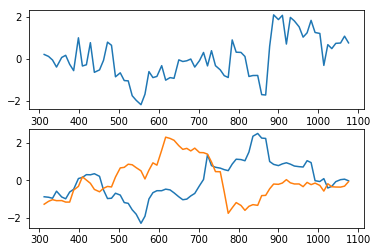

subject 09; gesture 1_1_1; avg 0.607697308667617; sd 0.03134393029898963
subject 09; gesture 1_1_1; PoV: 0.8634034616140518


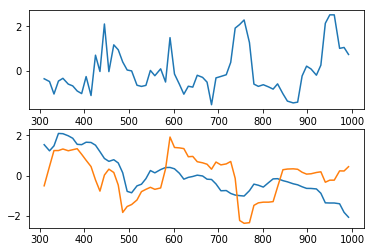

subject 09; gesture 1_0_1; avg 0.5003333035656357; sd 0.02948506174597806
subject 09; gesture 1_0_1; PoV: 0.8692704445854018


subject 09; gesture 1_0_2; avg 0.5880904696507594; sd 0.029099135729975894
subject 09; gesture 1_0_2; PoV: 0.873183139239384


subject 03; gesture 1_1_2; avg 0.5330769918361516; sd 0.022158059549028858
subject 03; gesture 1_1_2; PoV: 0.8767919724454549


subject 03; gesture 1_1_1; avg 0.7533613145350081; sd 0.033220157603579645
subject 03; gesture 1_1_1; PoV: 0.8821233134594164


subject 03; gesture 1_0_1; avg 0.5668460713877913; sd 0.04110048221933239
subject 03; gesture 1_0_1; PoV: 0.8507842483943435


subject 03; gesture 1_0_2; avg 0.6584225215228705; sd 0.04769995672109888
subject 03; gesture 1_0_2; PoV: 0.8507489180440417


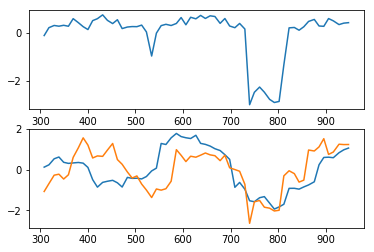

subject 05; gesture 1_1_2; avg 0.7233857057899281; sd 0.09745769414380386
subject 05; gesture 1_1_2; PoV: 0.7965314746002385


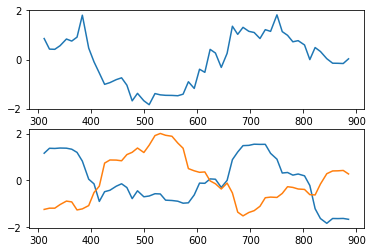

subject 05; gesture 1_1_1; avg 0.7460315311590531; sd 0.0373293025759801
subject 05; gesture 1_1_1; PoV: 0.8696799138336859


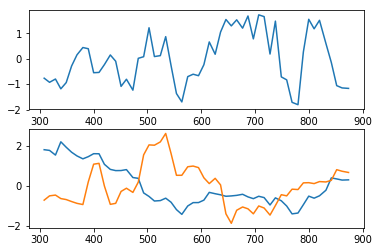

subject 05; gesture 1_0_1; avg 0.4697032014629405; sd 0.018599942551706355
subject 05; gesture 1_0_1; PoV: 0.8841721770809557


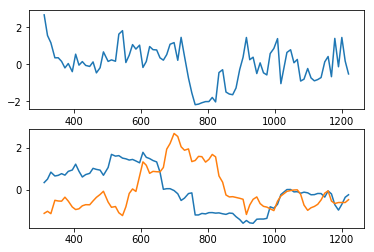

subject 05; gesture 1_0_2; avg 0.599501755958484; sd 0.030933756500629114
subject 05; gesture 1_0_2; PoV: 0.8638726171626975


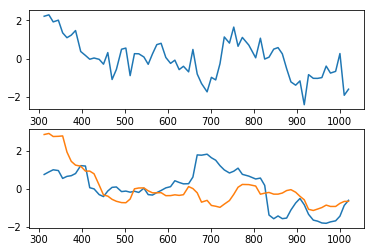

subject 21; gesture 1_1_2; avg 0.5534889100069329; sd 0.04384725368692787
subject 21; gesture 1_1_2; PoV: 0.8377899136275132


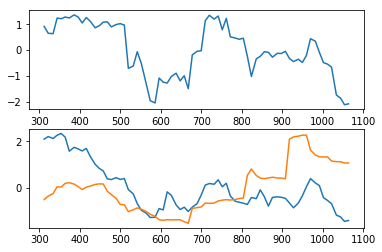

subject 21; gesture 1_1_1; avg 0.8420164343082931; sd 0.29988557229163476
subject 21; gesture 1_1_1; PoV: 0.7644102194574413


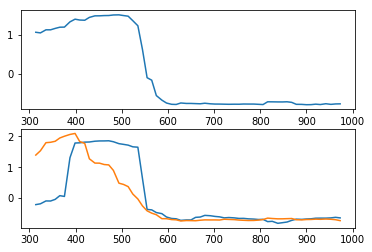

subject 21; gesture 1_0_1; avg 0.6964460948504474; sd 0.04403024928798732
subject 21; gesture 1_0_1; PoV: 0.8582839840276326


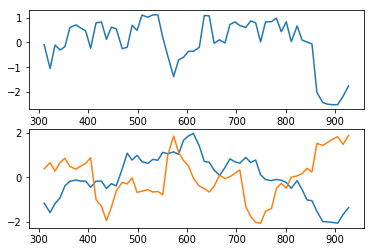

subject 21; gesture 1_0_2; avg 0.6936588192095755; sd 0.03233992219477818
subject 21; gesture 1_0_2; PoV: 0.8714757235393957


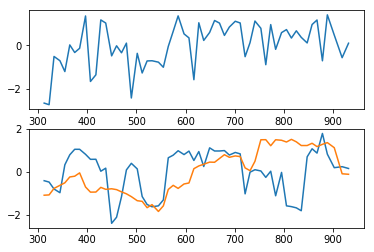

subject 17; gesture 1_1_2; avg 0.5465000614410719; sd 0.04737098307098233
subject 17; gesture 1_1_2; PoV: 0.8417056556287125


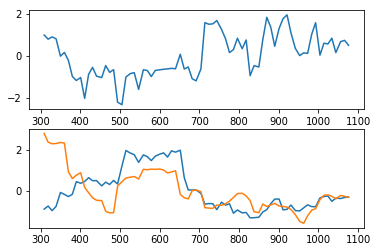

subject 17; gesture 1_1_1; avg 0.6533223462001171; sd 0.03240696522439894
subject 17; gesture 1_1_1; PoV: 0.8617183583575754


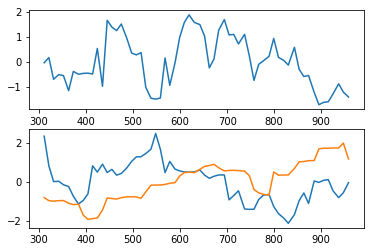

subject 17; gesture 1_0_1; avg 0.5664097945774523; sd 0.03795218987817801
subject 17; gesture 1_0_1; PoV: 0.847577777572923


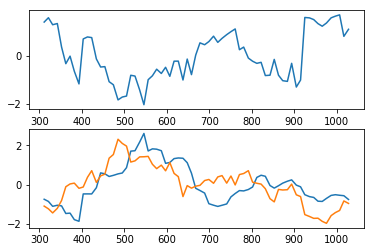

subject 17; gesture 1_0_2; avg 0.6826905675701117; sd 0.20093254408346087
subject 17; gesture 1_0_2; PoV: 0.6961856063822693


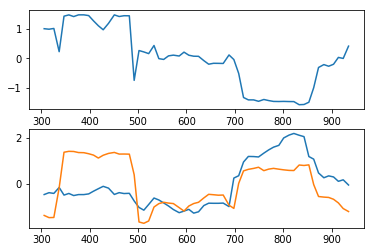

subject 01; gesture 1_1_2; avg 0.6326396915344524; sd 0.03043342973285077
subject 01; gesture 1_1_2; PoV: 0.8735293339584904


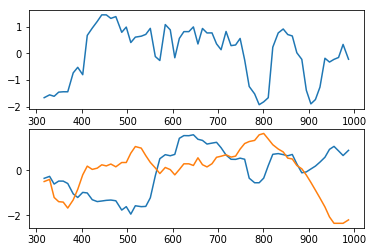

subject 01; gesture 1_1_1; avg 0.5895598989363297; sd 0.030275914242088107
subject 01; gesture 1_1_1; PoV: 0.862423219989083


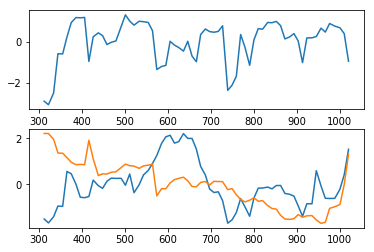

subject 01; gesture 1_0_1; avg 0.4426473183862681; sd 0.028201322834171667
subject 01; gesture 1_0_1; PoV: 0.853131471265075


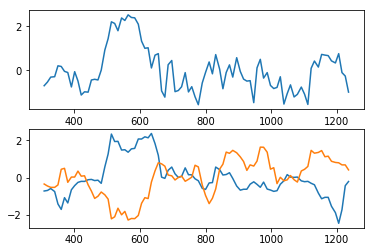

subject 01; gesture 1_0_2; avg 0.49566667295464717; sd 0.021833548887219206
subject 01; gesture 1_0_2; PoV: 0.8750276470465813


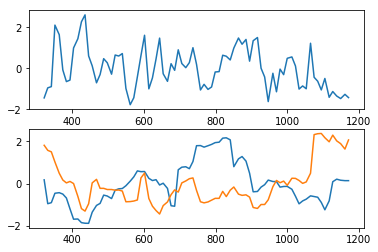

subject 16; gesture 1_1_2; avg 0.8135296460418286; sd 0.06886952382766347
subject 16; gesture 1_1_2; PoV: 0.8328092046884343


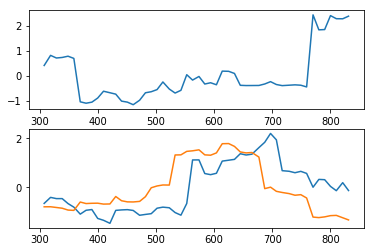

subject 16; gesture 1_1_1; avg 0.5501587879892128; sd 0.07297201771526746
subject 16; gesture 1_1_1; PoV: 0.793460042005618


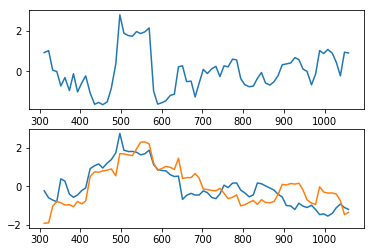

subject 16; gesture 1_0_1; avg 0.911229191332562; sd 0.131307713605954
subject 16; gesture 1_0_1; PoV: 0.7928479045081795


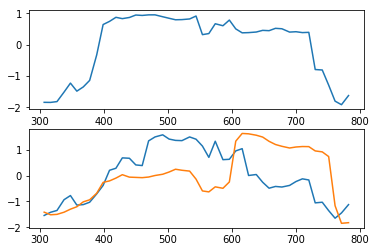

subject 16; gesture 1_0_2; avg 0.7671203557032845; sd 0.0674098432701795
subject 16; gesture 1_0_2; PoV: 0.8416368508639485


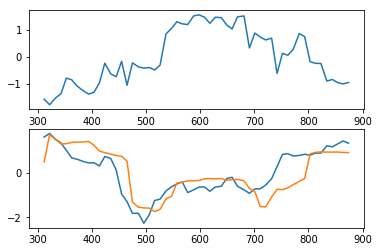

subject 26; gesture 1_1_2; avg 0.71898907451036; sd 0.03356409371418881
subject 26; gesture 1_1_2; PoV: 0.8716709828741985


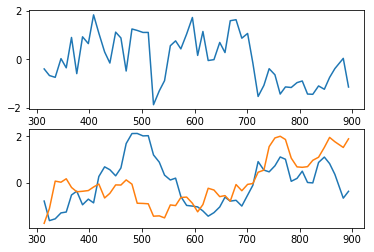

subject 26; gesture 1_1_1; avg 0.7619257752043676; sd 0.12077679950042326
subject 26; gesture 1_1_1; PoV: 0.8003954005951227


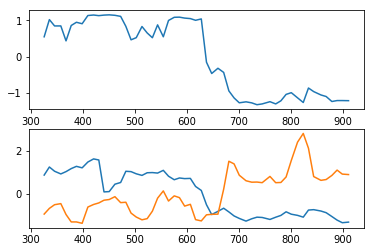

subject 26; gesture 1_0_1; avg 0.2019393106779102; sd 0.007947906915042892
subject 26; gesture 1_0_1; PoV: 0.8798709692577827


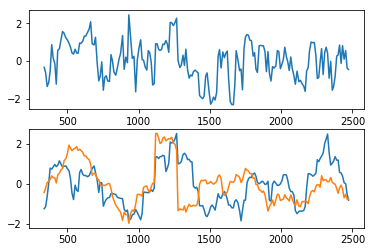

subject 26; gesture 1_0_2; avg 0.6293284751938278; sd 0.04147287792258208
subject 26; gesture 1_0_2; PoV: 0.8605612949792243


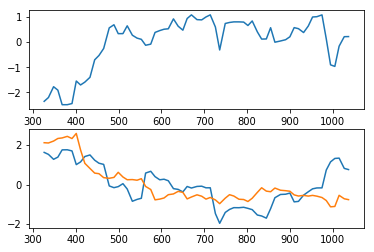

subject 32; gesture 1_1_2; avg 0.5230836712671068; sd 0.03274949949125842
subject 32; gesture 1_1_2; PoV: 0.8569499612856661


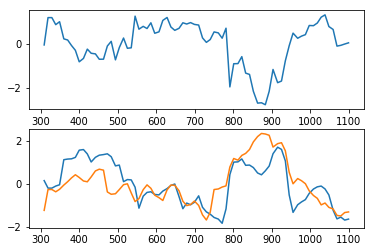

subject 32; gesture 1_1_1; avg 0.6012786216848157; sd 0.035664714845528175
subject 32; gesture 1_1_1; PoV: 0.8578598894262093


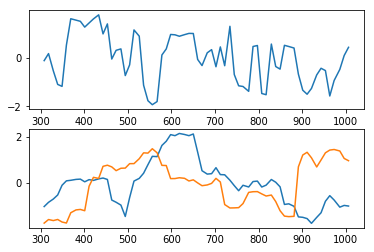

subject 32; gesture 1_0_1; avg 0.577219855946765; sd 0.0354095847605982
subject 32; gesture 1_0_1; PoV: 0.8589920257465435


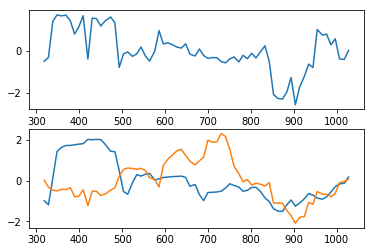

subject 32; gesture 1_0_2; avg 0.7299779616739501; sd 0.09661396964330907
subject 32; gesture 1_0_2; PoV: 0.8091133009453061


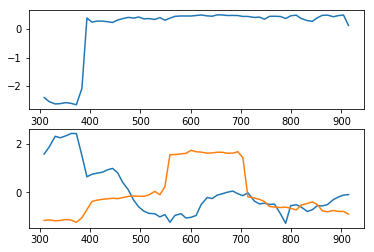

subject 04; gesture 1_1_2; avg 0.5574948502553446; sd 0.03151486279894581
subject 04; gesture 1_1_2; PoV: 0.8591901393493444


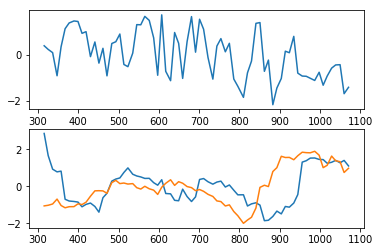

subject 04; gesture 1_1_1; avg 0.5860730052101459; sd 0.03199558222955855
subject 04; gesture 1_1_1; PoV: 0.8623514243046889


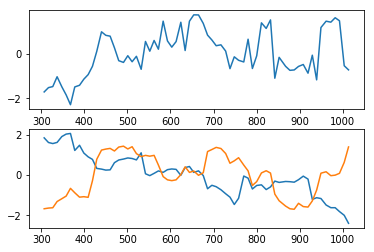

subject 04; gesture 1_0_1; avg 0.697839672174195; sd 0.034765320914831775
subject 04; gesture 1_0_1; PoV: 0.8658769904313235


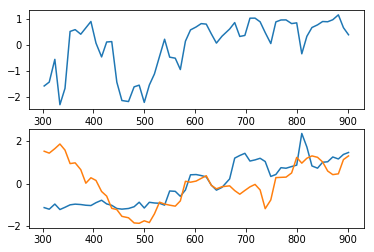

subject 04; gesture 1_0_2; avg 0.6449769960733422; sd 0.034485646987152244
subject 04; gesture 1_0_2; PoV: 0.8628672277636005


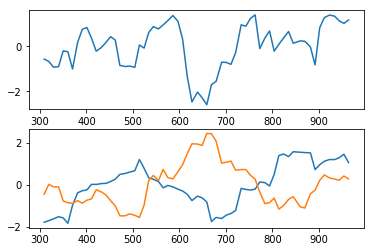

subject 08; gesture 1_1_2; avg 0.5537892644399192; sd 0.02488051311949347
subject 08; gesture 1_1_2; PoV: 0.8681089516153593


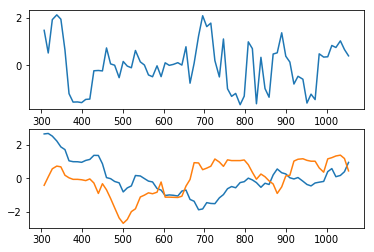

subject 08; gesture 1_1_1; avg 0.6641727099900843; sd 0.045758346264426666
subject 08; gesture 1_1_1; PoV: 0.8500378557624908


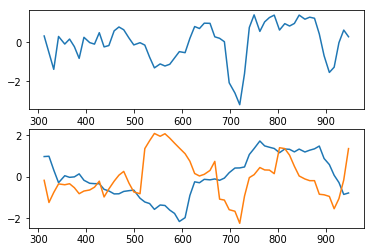

subject 08; gesture 1_0_1; avg 0.6173708784173624; sd 0.02723911508822423
subject 08; gesture 1_0_1; PoV: 0.8781034547987805


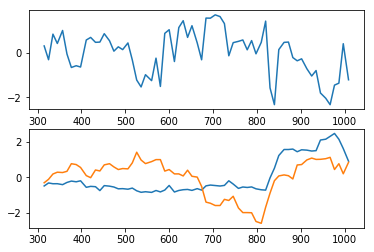

subject 08; gesture 1_0_2; avg 0.6632714196169993; sd 0.09387556500998957
subject 08; gesture 1_0_2; PoV: 0.8002726342729378


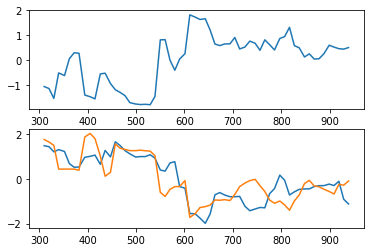

subject 27; gesture 1_1_2; avg 0.5810036934417694; sd 0.036608528847870685
subject 27; gesture 1_1_2; PoV: 0.8606167405466847


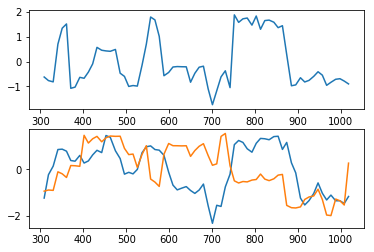

subject 27; gesture 1_1_1; avg 0.42040013081743116; sd 0.018950255491362186
subject 27; gesture 1_1_1; PoV: 0.8716080045781992


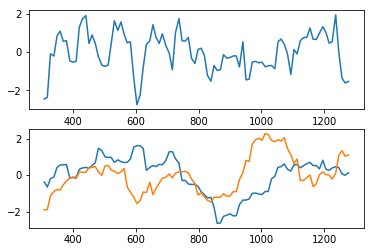

subject 27; gesture 1_0_1; avg 0.58152189735898; sd 0.03451569950122014
subject 27; gesture 1_0_1; PoV: 0.8497688853934883


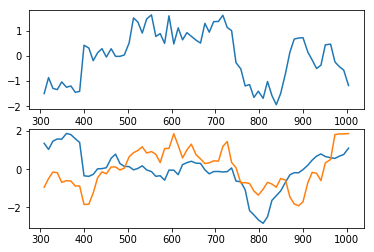

subject 27; gesture 1_0_2; avg 0.6248366708329459; sd 0.028593393770101356
subject 27; gesture 1_0_2; PoV: 0.8722070816125884


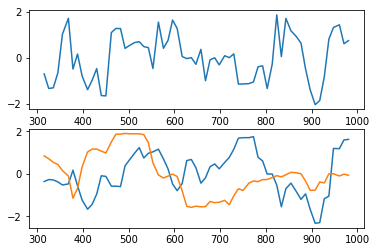

subject 14; gesture 1_1_2; avg 0.5381952790203421; sd 0.028726995358447326
subject 14; gesture 1_1_2; PoV: 0.8656674042212331


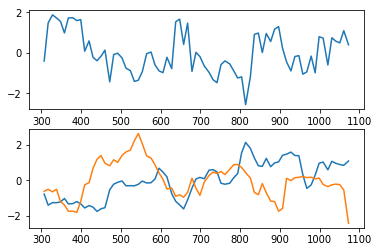

subject 14; gesture 1_1_1; avg 0.8480683711138329; sd 0.060028635904898146
subject 14; gesture 1_1_1; PoV: 0.8638127001669672


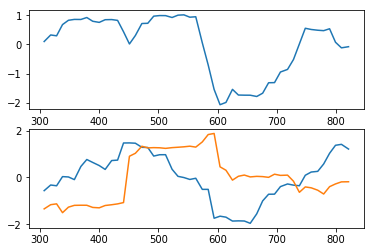

subject 14; gesture 1_0_1; avg 0.5143916921760723; sd 0.03179121635985793
subject 14; gesture 1_0_1; PoV: 0.8571558801605784


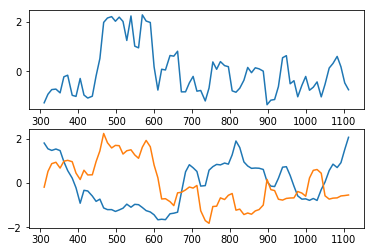

subject 14; gesture 1_0_2; avg 0.5753251422173183; sd 0.038075813621691657
subject 14; gesture 1_0_2; PoV: 0.8490599912441423


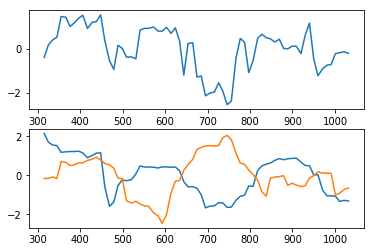

subject 23; gesture 1_1_2; avg 0.5250352151384219; sd 0.020880227162326896
subject 23; gesture 1_1_2; PoV: 0.8767493334980984


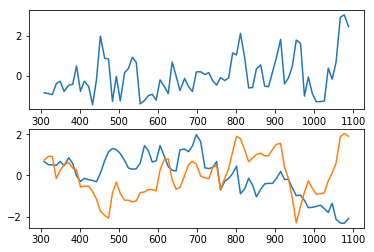

subject 23; gesture 1_1_1; avg 0.4869553583354741; sd 0.023394927799400264
subject 23; gesture 1_1_1; PoV: 0.8775985073579848


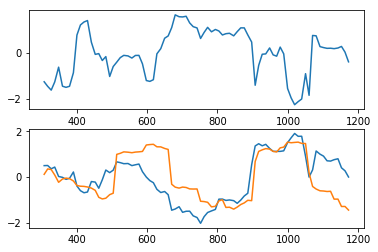

subject 23; gesture 1_0_1; avg 0.48536741163271585; sd 0.022900496145401707
subject 23; gesture 1_0_1; PoV: 0.8620054700047751


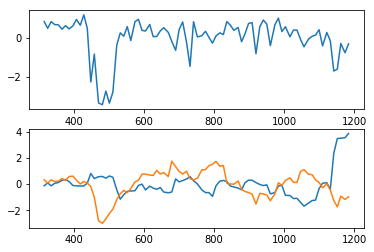

subject 23; gesture 1_0_2; avg 0.6003479521213767; sd 0.04443242673333299
subject 23; gesture 1_0_2; PoV: 0.8511286944197561


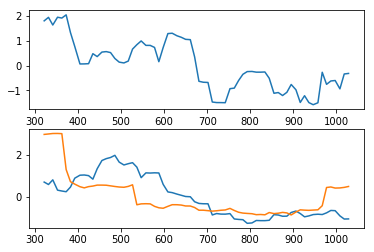

subject 25; gesture 1_1_2; avg 0.6586838626476401; sd 0.044131240909628285
subject 25; gesture 1_1_2; PoV: 0.8523309388052206


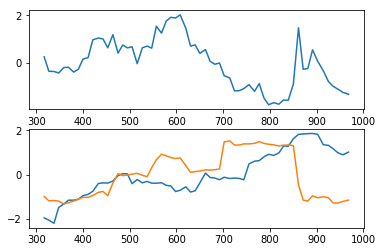

subject 25; gesture 1_1_1; avg 0.48808702336538556; sd 0.03274608859228424
subject 25; gesture 1_1_1; PoV: 0.8531218552942701


subject 25; gesture 1_0_1; avg 0.5930096261119171; sd 0.02369055116685653
subject 25; gesture 1_0_1; PoV: 0.874983965900802


subject 25; gesture 1_0_2; avg 0.6562787070689026; sd 0.0354842116757376
subject 25; gesture 1_0_2; PoV: 0.8589126242741083


subject 18; gesture 1_1_2; avg 0.5101848157861306; sd 0.025155335220709844
subject 18; gesture 1_1_2; PoV: 0.8761671007202692


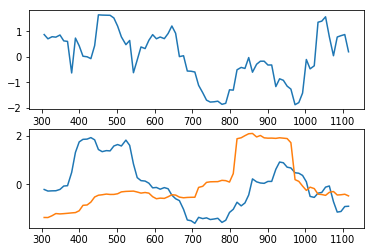

subject 18; gesture 1_1_1; avg 0.5378041113109696; sd 0.024959610976842867
subject 18; gesture 1_1_1; PoV: 0.8710993161540737


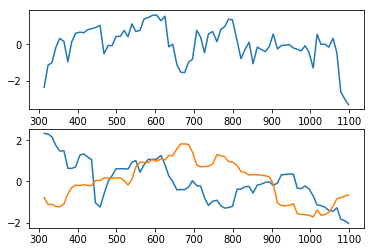

subject 18; gesture 1_0_1; avg 0.7979806873141979; sd 0.06486389320597631
subject 18; gesture 1_0_1; PoV: 0.8379780697833362


subject 18; gesture 1_0_2; avg 0.514951891056213; sd 0.04126450964926122
subject 18; gesture 1_0_2; PoV: 0.8446171062235648


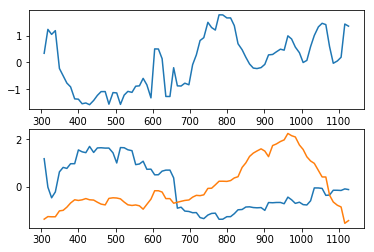

subject 29; gesture 1_1_2; avg 0.6379695398966232; sd 0.04000191509694636
subject 29; gesture 1_1_2; PoV: 0.8600430048580001


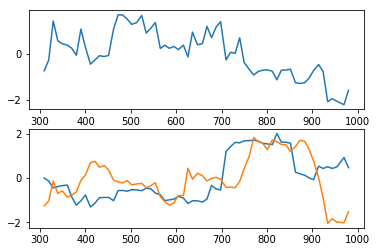

subject 29; gesture 1_1_1; avg 0.7153806480225748; sd 0.028358140189012483
subject 29; gesture 1_1_1; PoV: 0.8790366610869993


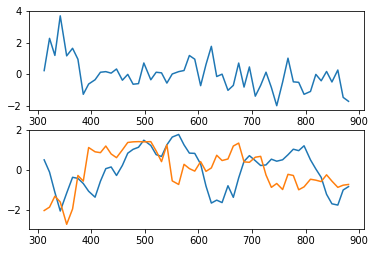

subject 29; gesture 1_0_1; avg 0.639889494259742; sd 0.029256182761584024
subject 29; gesture 1_0_1; PoV: 0.8786932590556605


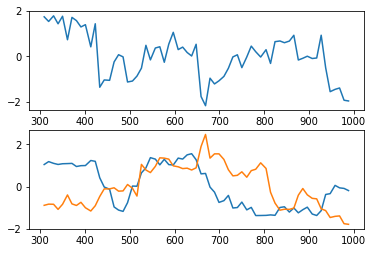

subject 29; gesture 1_0_2; avg 0.594624177727073; sd 0.03192323734617581
subject 29; gesture 1_0_2; PoV: 0.8650988434380756


subject 15; gesture 1_1_2; avg 0.5787751006913966; sd 0.13801735188938122
subject 15; gesture 1_1_2; PoV: 0.7704020521307292


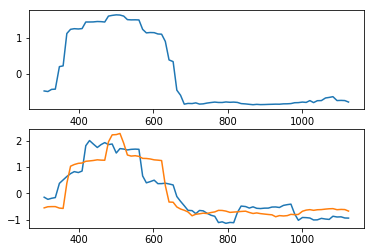

subject 15; gesture 1_1_1; avg 0.6469364270770689; sd 0.030636943361947715
subject 15; gesture 1_1_1; PoV: 0.8676757577742836


subject 15; gesture 1_0_1; avg 0.700273261356006; sd 0.055117802998995276
subject 15; gesture 1_0_1; PoV: 0.8402363850256737


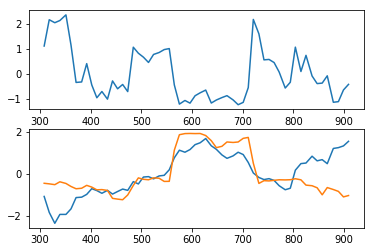

subject 15; gesture 1_0_2; avg 0.6313701267205601; sd 0.07945265676760234
subject 15; gesture 1_0_2; PoV: 0.8114547229589681


subject 28; gesture 1_1_2; avg 0.8306570852406457; sd 0.05835389377979266
subject 28; gesture 1_1_2; PoV: 0.839791929513334


subject 28; gesture 1_1_1; avg 1.0220963299586379; sd 0.07648107285965643
subject 28; gesture 1_1_1; PoV: 0.8466183571468491


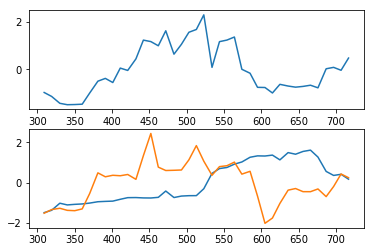

subject 28; gesture 1_0_1; avg 0.7648658994623136; sd 0.064595759626082
subject 28; gesture 1_0_1; PoV: 0.8356334256353909


subject 28; gesture 1_0_2; avg 0.6767054026906594; sd 0.038487311994639194
subject 28; gesture 1_0_2; PoV: 0.8652721176900605


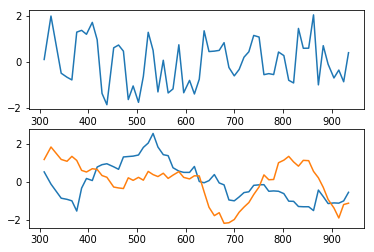

subject 12; gesture 1_1_2; avg 0.5515352403304737; sd 0.022548371575585008
subject 12; gesture 1_1_2; PoV: 0.8783386788098974


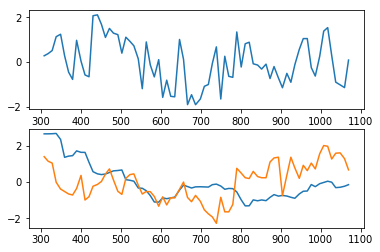

subject 12; gesture 1_1_1; avg 0.5765251312758151; sd 0.06217729723281434
subject 12; gesture 1_1_1; PoV: 0.8210983798045716


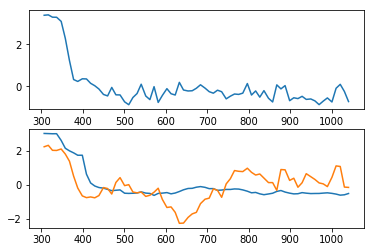

subject 12; gesture 1_0_1; avg 0.5410563336896479; sd 0.023238677412678994
subject 12; gesture 1_0_1; PoV: 0.8768821408736673


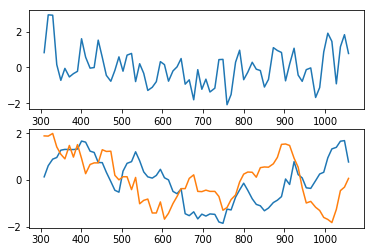

subject 12; gesture 1_0_2; avg 0.6402004707654636; sd 0.03294815953559511
subject 12; gesture 1_0_2; PoV: 0.8681313300415512


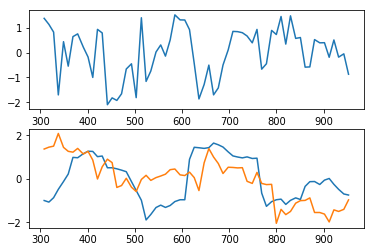

subject 19; gesture 1_1_2; avg 0.5343712808893181; sd 0.06934515933304995
subject 19; gesture 1_1_2; PoV: 0.8064539856991496


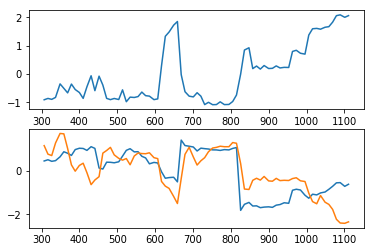

subject 19; gesture 1_1_1; avg 0.6707806838393247; sd 0.03194553445773708
subject 19; gesture 1_1_1; PoV: 0.8707979413763043


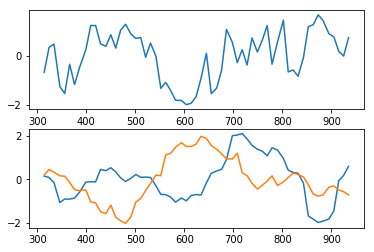

subject 19; gesture 1_0_1; avg 0.7939577827450204; sd 0.06110431318300135
subject 19; gesture 1_0_1; PoV: 0.8454745567935775


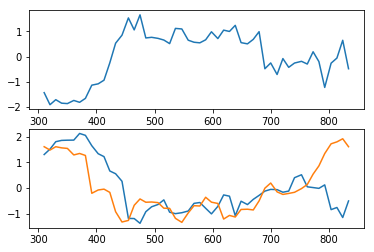

subject 19; gesture 1_0_2; avg 0.6376265300332589; sd 0.05949471793401754
subject 19; gesture 1_0_2; PoV: 0.8333621032557841


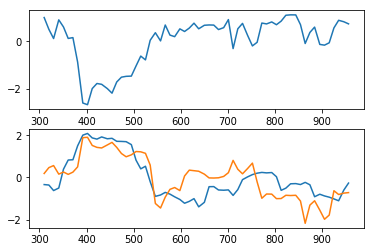

subject 07; gesture 1_1_2; avg 0.490288021445549; sd 0.023416119709953945
subject 07; gesture 1_1_2; PoV: 0.8657316435030442


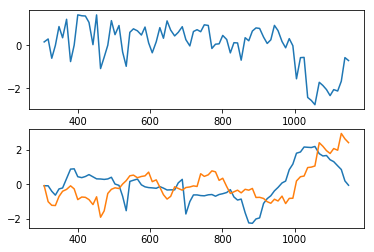

subject 07; gesture 1_1_1; avg 0.5890510602728357; sd 0.03205072480208393
subject 07; gesture 1_1_1; PoV: 0.858325625533494


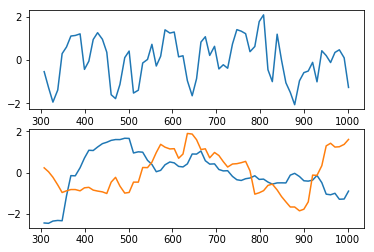

subject 07; gesture 1_0_1; avg 0.43918318522121513; sd 0.018624427542318456
subject 07; gesture 1_0_1; PoV: 0.8777489254389207


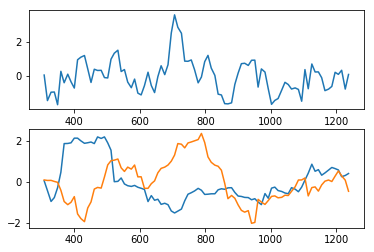

subject 07; gesture 1_0_2; avg 0.5486038351973154; sd 0.025344696186901012
subject 07; gesture 1_0_2; PoV: 0.8740864234528368


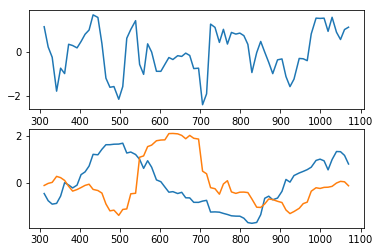

subject 20; gesture 1_1_2; avg 0.5303806233474896; sd 0.031887266455296846
subject 20; gesture 1_1_2; PoV: 0.8610727761761994


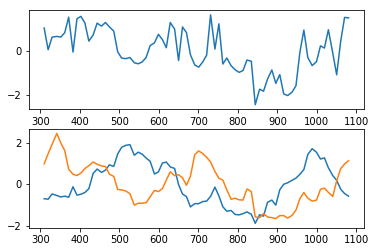

subject 20; gesture 1_1_1; avg 0.4995927673971; sd 0.03492252561656184
subject 20; gesture 1_1_1; PoV: 0.8478795194600249


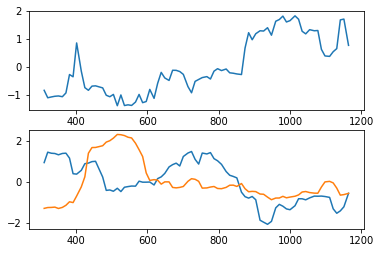

subject 20; gesture 1_0_1; avg 0.5071041176341513; sd 0.02236466252329881
subject 20; gesture 1_0_1; PoV: 0.8659727503129961


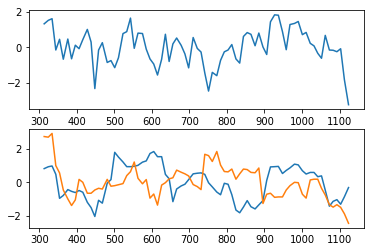

subject 20; gesture 1_0_2; avg 0.393192111806476; sd 0.02330374059012123
subject 20; gesture 1_0_2; PoV: 0.8641316358410301


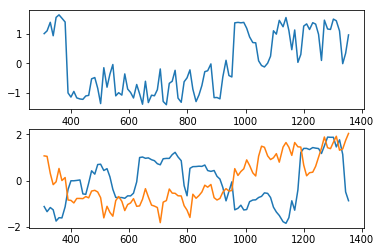

subject 31; gesture 1_1_2; avg 0.662141728163508; sd 0.0250564735126224
subject 31; gesture 1_1_2; PoV: 0.88982297465063


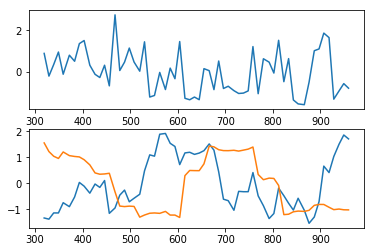

subject 31; gesture 1_1_1; avg 0.6448142084789713; sd 0.03727746450763343
subject 31; gesture 1_1_1; PoV: 0.8656912724156529


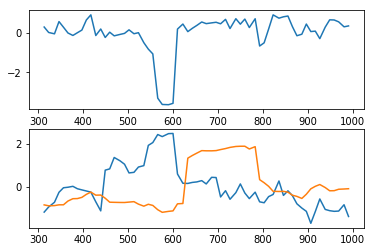

subject 31; gesture 1_0_1; avg 0.4233271946982415; sd 0.018997182835120523
subject 31; gesture 1_0_1; PoV: 0.875501308227506


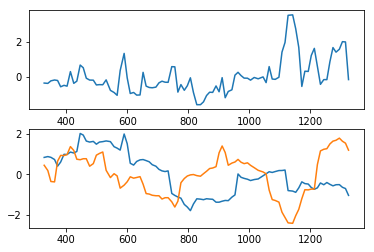

subject 31; gesture 1_0_2; avg 0.6163145773140212; sd 0.03484145780853415
subject 31; gesture 1_0_2; PoV: 0.8661078127281778


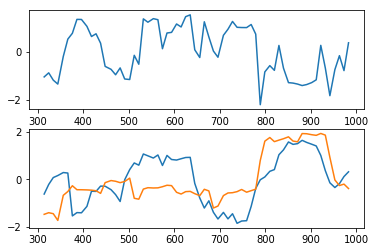

subject 13; gesture 1_1_2; avg 0.45624620866307414; sd 0.019544980959200466
subject 13; gesture 1_1_2; PoV: 0.881413956650405


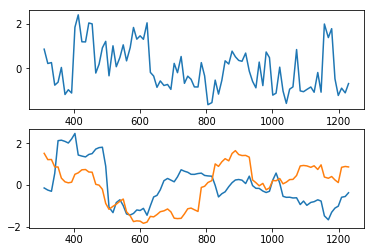

subject 13; gesture 1_1_1; avg 0.5136564843803011; sd 0.025746195966628135
subject 13; gesture 1_1_1; PoV: 0.8686090837246119


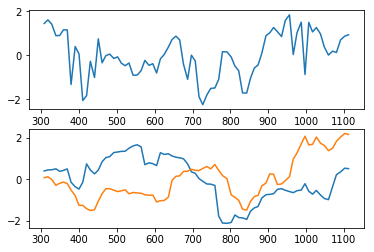

subject 13; gesture 1_0_1; avg 0.22250978297305435; sd 0.0088713636309734
subject 13; gesture 1_0_1; PoV: 0.8807622913148321


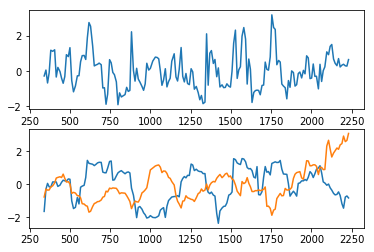

subject 13; gesture 1_0_2; avg 0.39327698767354885; sd 0.020554828229896595
subject 13; gesture 1_0_2; PoV: 0.8694813036792817


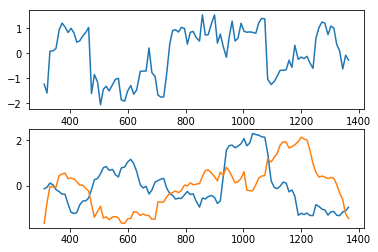

subject 36; gesture 1_1_2; avg 0.6146368824368792; sd 0.02621421295915012
subject 36; gesture 1_1_2; PoV: 0.8805389911565085


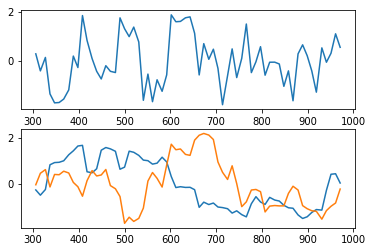

subject 36; gesture 1_1_1; avg 0.5587341332071176; sd 0.029632487119040415
subject 36; gesture 1_1_1; PoV: 0.8688709761739312


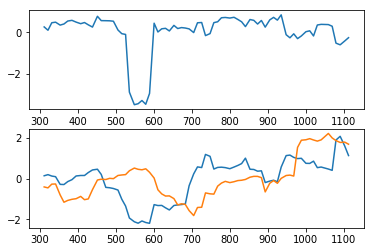

subject 36; gesture 1_0_1; avg 0.6918945916981729; sd 0.04177886422972476
subject 36; gesture 1_0_1; PoV: 0.8580397466632128


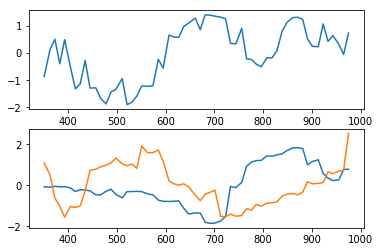

subject 36; gesture 1_0_2; avg 0.711111305443769; sd 0.15332461338484984
subject 36; gesture 1_0_2; PoV: 0.7670621634076055


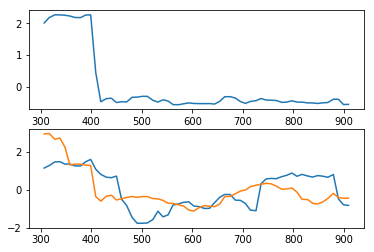

subject 24; gesture 1_1_2; avg 0.5770839865287035; sd 0.049510580633561195
subject 24; gesture 1_1_2; PoV: 0.8379474480353694


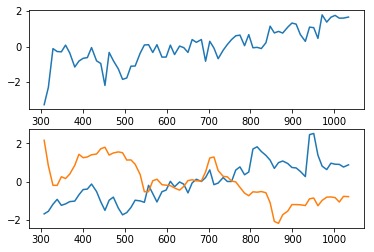

subject 24; gesture 1_1_1; avg 0.6404815463553961; sd 0.026621398551814997
subject 24; gesture 1_1_1; PoV: 0.8726022004277655


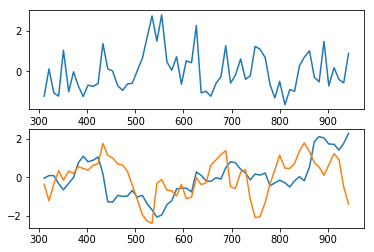

subject 24; gesture 1_0_1; avg 0.5251410418177572; sd 0.027771007507979152
subject 24; gesture 1_0_1; PoV: 0.8666584377793523


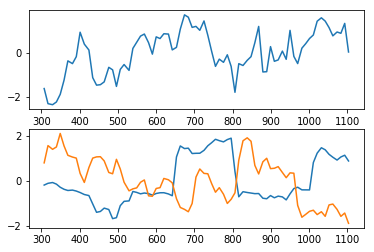

subject 24; gesture 1_0_2; avg 0.5593352786532241; sd 0.039914509900403544
subject 24; gesture 1_0_2; PoV: 0.850815737061951


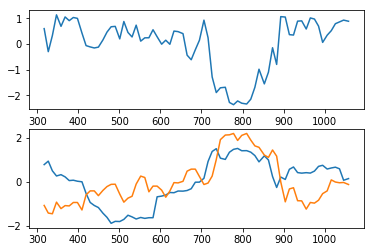

subject 33; gesture 1_1_2; avg 0.5509341490338114; sd 0.03313943460954454
subject 33; gesture 1_1_2; PoV: 0.8600207830242137


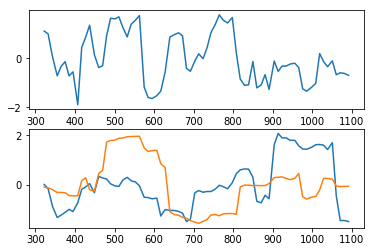

subject 33; gesture 1_1_1; avg 0.5418229176570998; sd 0.03814707416716364
subject 33; gesture 1_1_1; PoV: 0.8450401595715428


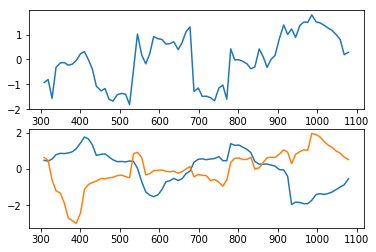

subject 33; gesture 1_0_1; avg 0.5827124634148718; sd 0.030516891810927135
subject 33; gesture 1_0_1; PoV: 0.8608167865390828


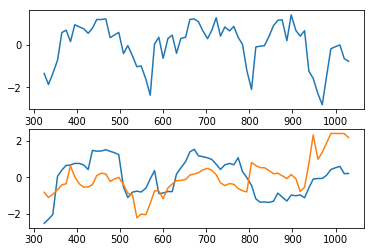

subject 33; gesture 1_0_2; avg 0.5477657200095484; sd 0.03139708565803637
subject 33; gesture 1_0_2; PoV: 0.856131953718447


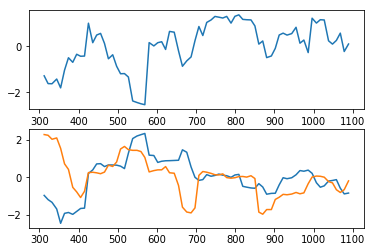

subject 11; gesture 1_1_2; avg 0.5078537650898273; sd 0.02172318190277224
subject 11; gesture 1_1_2; PoV: 0.8691628506598129


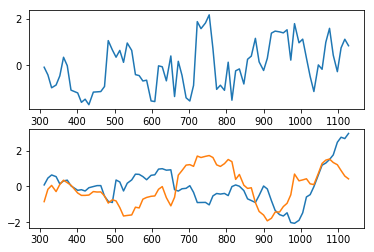

subject 11; gesture 1_1_1; avg 0.45842173990393664; sd 0.01986319418862989
subject 11; gesture 1_1_1; PoV: 0.8726719758553775


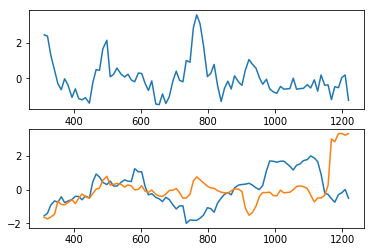

subject 11; gesture 1_0_1; avg 0.4913712739727872; sd 0.020299617859115344
subject 11; gesture 1_0_1; PoV: 0.8828955193068354


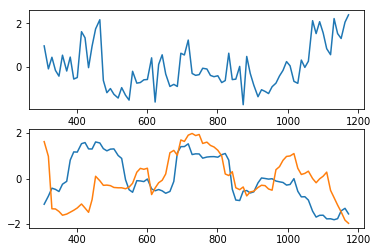

subject 11; gesture 1_0_2; avg 0.5811903323318627; sd 0.029377935050574726
subject 11; gesture 1_0_2; PoV: 0.8720825485370097


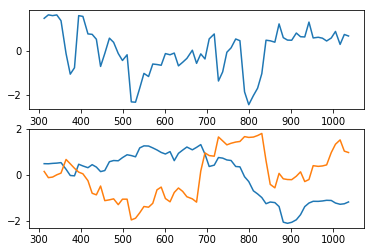

subject 35; gesture 1_1_2; avg 0.5591274862265698; sd 0.029362819583788814
subject 35; gesture 1_1_2; PoV: 0.8626719138501833


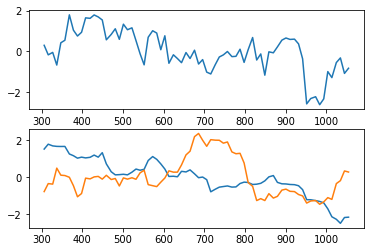

subject 35; gesture 1_1_1; avg 0.7273940726029913; sd 0.0669882661949975
subject 35; gesture 1_1_1; PoV: 0.8397454503159826


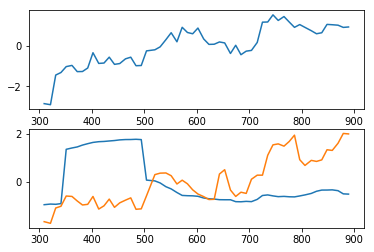

subject 35; gesture 1_0_1; avg 0.6062214855348234; sd 0.04672705390289843
subject 35; gesture 1_0_1; PoV: 0.8378834670075518


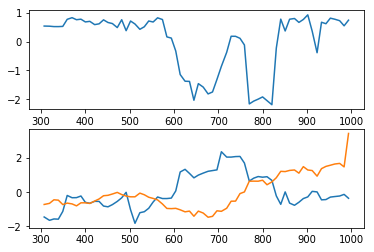

subject 35; gesture 1_0_2; avg 0.5086785665597885; sd 0.0218207974236966
subject 35; gesture 1_0_2; PoV: 0.871837585977785


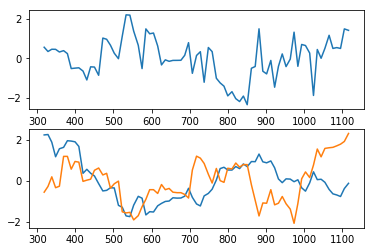

subject 22; gesture 1_1_2; avg 0.8020959956078424; sd 0.05874416478225623
subject 22; gesture 1_1_2; PoV: 0.8497642019856699


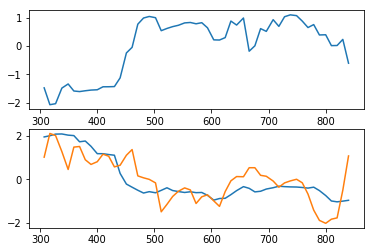

subject 22; gesture 1_1_1; avg 0.6351249185068307; sd 0.061544409612024
subject 22; gesture 1_1_1; PoV: 0.8338144706536164


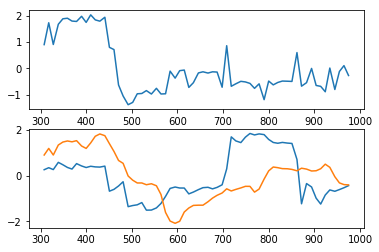

subject 22; gesture 1_0_1; avg 0.691633896162664; sd 0.03364388203892653
subject 22; gesture 1_0_1; PoV: 0.8626098294902707


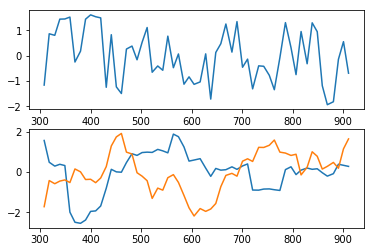

subject 22; gesture 1_0_2; avg 0.564241144379669; sd 0.025308478022924286
subject 22; gesture 1_0_2; PoV: 0.8707022491027063


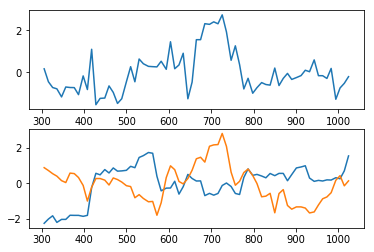

subject 34; gesture 1_1_2; avg 0.6141944581589254; sd 0.03308201192984416
subject 34; gesture 1_1_2; PoV: 0.8652704716328047


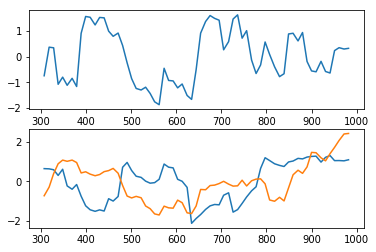

subject 34; gesture 1_1_1; avg 0.4285837397365632; sd 0.022922380419475676
subject 34; gesture 1_1_1; PoV: 0.8694943071571477


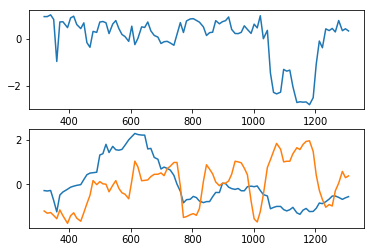

subject 34; gesture 1_0_1; avg 0.5120637748983491; sd 0.024202362550285513
subject 34; gesture 1_0_1; PoV: 0.8741964147099903


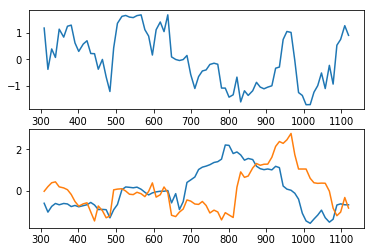

subject 34; gesture 1_0_2; avg 0.5205033935078485; sd 0.029089652493052176
subject 34; gesture 1_0_2; PoV: 0.8525847427225625


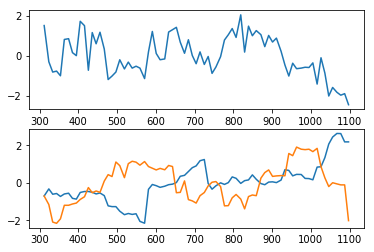

subject 10; gesture 1_1_2; avg 0.6292938966663841; sd 0.0330311230433798
subject 10; gesture 1_1_2; PoV: 0.8658756524782312


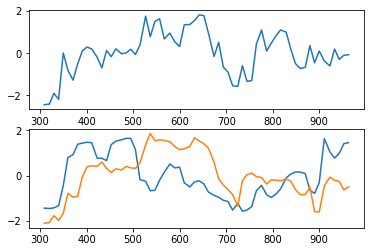

subject 10; gesture 1_1_1; avg 0.5491351886723058; sd 0.028248846851239552
subject 10; gesture 1_1_1; PoV: 0.8682801274252382


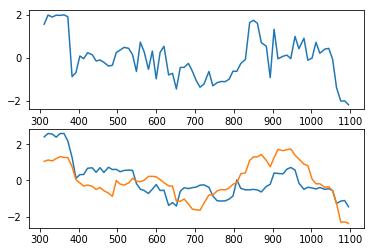

subject 10; gesture 1_0_1; avg 0.34166848365267716; sd 0.016881841943117853
subject 10; gesture 1_0_1; PoV: 0.8689412815540802


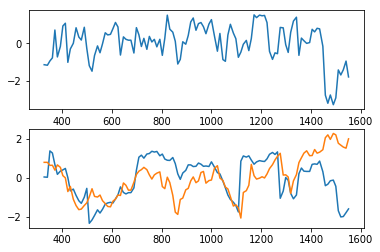

subject 10; gesture 1_0_2; avg 0.5805905364706783; sd 0.05429314783818714
subject 10; gesture 1_0_2; PoV: 0.8291320291983901


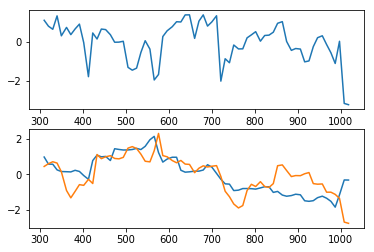

subject 02; gesture 1_1_2; avg 0.5654328621185939; sd 0.039665908474925224
subject 02; gesture 1_1_2; PoV: 0.8488713497809856


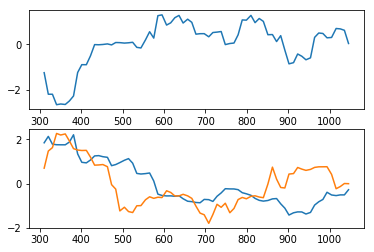

subject 02; gesture 1_1_1; avg 0.48366568951150535; sd 0.026227685249540524
subject 02; gesture 1_1_1; PoV: 0.8684718261257596


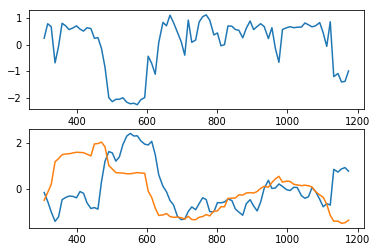

subject 02; gesture 1_0_1; avg 0.6513376560121327; sd 0.07538333256964978
subject 02; gesture 1_0_1; PoV: 0.8210150800263905


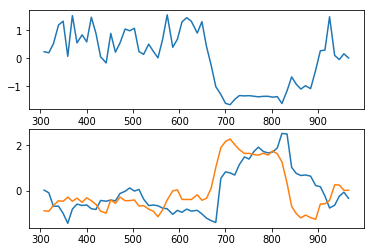

subject 02; gesture 1_0_2; avg 0.5503260629004004; sd 0.030956214921354645
subject 02; gesture 1_0_2; PoV: 0.8681568436436842


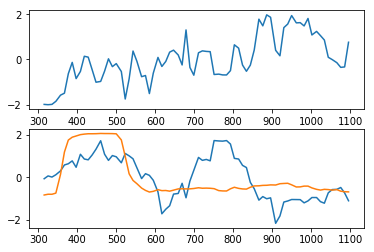

In [5]:
decomp_g1_ant = {}

for s, gdict in g1_dict_antag.items():
    decomp_g1_ant[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_ant[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26

gesture 1_1_2

gesture 1_0_1

32

gesture 1_1_1

08

gesture 1_1_2

gesture 1_0_1

27

gesture 1_1_1

gesture 1_0_2

23

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25

gesture 1_0_1


18

gesture 1_1_2

gesture 1_1_1

29

gesture 1_1_1

gesture 1_0_1

15

gesture 1_1_1

12

gesture 1_1_2

gesture 1_0_1

19

gesture 1_1_1

07

gesture 1_1_2

gesture 1_0_1

gesture 1_0_2

20

gesture 1_0_1

31

gesture 1_1_2

gesture 1_0_1

13

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

36

gesture 1_1_2

24

gesture 1_1_1

gesture 1_0_1

33

gesture 1_0_1

11

gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

gesture 1_0_2

35

gesture 1_0_2

22

gesture 1_0_1

gesture 1_0_2

34

gesture 1_0_1

gesture 1_0_2

10

gesture 1_1_2

gesture 1_0_1

---

In [6]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_ant.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_ant.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [7]:
np.average([d for d in compares["30"].values()])

7.3497006934571845